In [1]:
# import pandas, numpy

import pandas as pd
import numpy as np
import datetime as dt

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)

In [2]:
# read in data

allstar = pd.read_csv("./baseballdatabank-2019.2/core/AllstarFull.csv")
appear = pd.read_csv("./baseballdatabank-2019.2/core/Appearances.csv")
awardplay = pd.read_csv("./baseballdatabank-2019.2/core/AwardsPlayers.csv")
batting = pd.read_csv("./baseballdatabank-2019.2/core/Batting.csv")
battingpost = pd.read_csv("./baseballdatabank-2019.2/core/BattingPost.csv")
fielding = pd.read_csv("./baseballdatabank-2019.2/core/Fielding.csv")

#fieldingof = pd.read_csv("./baseballdatabank-2019.2/core/FieldingOF.csv")

fieldingofsplit = pd.read_csv("./baseballdatabank-2019.2/core/FieldingOFsplit.csv")
fieldingpost = pd.read_csv("./baseballdatabank-2019.2/core/FieldingPost.csv")


hof = pd.read_csv("./baseballdatabank-2019.2/core/HallOfFame.csv")
hof.drop(columns=['votedBy', 'ballots', 'needed', 'votes', 'needed_note'], axis=1, inplace=True)

people = pd.read_csv("./baseballdatabank-2019.2/core/People.csv")
people.drop(columns = ['birthYear', 'birthMonth', 'birthDay', 'birthCountry', 'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathCountry', 'deathDay', 'deathState', 'deathCity', 'nameGiven'], axis=1, inplace=True)

pitch = pd.read_csv("./baseballdatabank-2019.2/core/Pitching.csv")
pitchpost = pd.read_csv("./baseballdatabank-2019.2/core/PitchingPost.csv")
# salaries = pd.read_csv("./baseballdatabank-2019.2/core/Salaries.csv")
fangraph = pd.read_csv("./FanGraphs Leaderboard.csv")

In [3]:
# drop people who have not ended their careers or who never played a game

debutnotnull = people[people['debut'].notnull()]
finalgamenotnull = people[people['finalGame'].notnull()]
people = pd.concat([debutnotnull,finalgamenotnull]).drop_duplicates()

# make people debut and final game columns into dates
people['debut'] = pd.to_datetime(people['debut'])
people['finalGame'] = pd.to_datetime(people['finalGame'])

# get difference between debuts and final games
people['careerlength'] = people['finalGame'] - people['debut']
# converts careerlength to # days
people['careerlength'] = people['careerlength'].astype(dt.timedelta).map(lambda x: np.nan if pd.isnull(x) else x.days)

people['recentretire'] = dt.datetime.now() - people['finalGame']
people['recentretire'] = people['recentretire'].astype(dt.timedelta).map(lambda x: np.nan if pd.isnull(x) else x.days)

people['Name'] = people['nameFirst'] + ' ' + people['nameLast']

In [4]:
# rosepe01 - Pete Rose
# jacksjo01 - Shoeless Joe Jackson
# bondsba01 - Barry Bonds
# mcgwima01 - Mark McGwire
# sosasa01 - Sammy Sosa
# ramirma02 - Manny Ramirez
# clemero02 - Roger Clemens
# palmera01 - Rafael Palmeiro
# rodriiv01 - Ivan Rodriguez
# sheffga01 - Gary Sheffield
# rodrigal01
cheaters = ['rosepe01', 'jacksjo01', 'bondsba01', 'mcgwima01', 'sosasa01', 'ramirma02', 'clemero02', 'palmera01', 'rodriiv01',
           'sheffga01', 'rodrial01']
people['scandal'] = people['playerID'].apply(lambda x : 1 if x in cheaters else 0)

In [5]:
# in our learning, we are looking at all players who didn't make the Hall, not
# just those who were voted on
# so, we can remove those from the hall table that got nos, just leaving the yes
hof = hof[hof['inducted'] == 'Y']

# remove non-players from the hall
hof = hof[hof['category'] == 'Player']

# remove players from the hall that are not in our people table
peopinhall = pd.merge(people, hof, on='playerID').drop_duplicates()['playerID']
hof = hof[hof['playerID'].isin(peopinhall)]

In [6]:
pitch.fillna(0)
pitch = pitch[pitch['playerID'] != 'ruthba01']
pitchstats = pitch.groupby(by='playerID',as_index=False).agg({'IPouts' : np.sum})
pitchstats = pitchstats[pitchstats['IPouts'] > 100]
people = people[~people['playerID'].isin(pitchstats['playerID'])]

In [7]:
stats = {'G' : 0, 'AB' : 0, 'R' : 0, 'H' : 0, '2B' : 0, '3B' : 0, 'HR' : 0, 'RBI' : 0, 'SB' : 0, 'CS' : 0, 'BB' : 0, 'SO' : 0, 'IBB' : 0, 'HBP' : 0, 'SH' : 0, 'SF' : 0, 'GIDP' : 0}

# replace NaNs in batting with 0s
batting.fillna(value=stats)
battingpost.fillna(value=stats)

# only get batting of people in our table
batting = batting[batting['playerID'].isin(people['playerID'])]
battingpost = battingpost[battingpost['playerID'].isin(people['playerID'])]

In [8]:
careerstats = batting.groupby('playerID').agg({'G' : np.sum, 'AB' : np.sum, 'R' : np.sum, 'H' : np.sum, '2B': np.sum, '3B' : np.sum, 'HR' : np.sum, 'RBI' : np.sum, 'SB' : np.sum, 'CS' : np.sum, 'BB' : np.sum, 'SO' : np.sum, 'IBB' : np.sum, 'HBP' : np.sum, 'SH' : np.sum, 'SF' : np.sum, 'GIDP' : np.sum})
careerpoststats = battingpost.groupby('playerID').agg({'G' : np.sum, 'AB' : np.sum, 'R' : np.sum, 'H' : np.sum, '2B': np.sum, '3B' : np.sum, 'HR' : np.sum, 'RBI' : np.sum, 'SB' : np.sum, 'CS' : np.sum, 'BB' : np.sum, 'SO' : np.sum, 'IBB' : np.sum, 'HBP' : np.sum, 'SH' : np.sum, 'SF' : np.sum, 'GIDP' : np.sum})

In [9]:
# get appearances of only people in our table
appear = appear[appear['playerID'].isin(people['playerID'])]

stats = {'G_all' : 0, 'GS' : 0, 'G_batting' : 0, 'G_defense' : 0, 'G_p' : 0, 'G_c' : 0, 'G_1b' : 0, 'G_2b' : 0, 'G_3b' : 0, 'G_ss' : 0, 'G_lf' : 0, 'G_cf' : 0, 'G_rf' : 0, 'G_of' : 0, 'G_dh' : 0, 'G_ph' : 0, 'G_pr' : 0}
appear.fillna(value=stats)

careerapp = appear.groupby('playerID').agg({'G_all' : np.sum, 'G_batting' : np.sum, 'G_defense' : np.sum, 'G_p' : np.sum, 'G_c' : np.sum, 'G_1b' : np.sum, 'G_2b' : np.sum, 'G_3b' : np.sum, 'G_ss' : np.sum, 'G_lf' : np.sum, 'G_cf' : np.sum, 'G_rf' : np.sum, 'G_of' : np.sum, 'G_dh' : np.sum, 'G_ph' : np.sum, 'G_pr' : np.sum})

careerapp = careerapp[careerapp['G_all'] >= 500]
careerapp['pitchpct'] = careerapp['G_p'] / careerapp['G_all']
careerapp = careerapp[careerapp['pitchpct'] < .75]

In [10]:
fielding = fielding[fielding['playerID'].isin(people['playerID'])]
stats = {'G' : 0, 'GS' : 0, 'InnOuts' : 0, 'PO' : 0, 'A' : 0, 'E' : 0, 'DP' : 0, 'PB' : 0, 'WP' : 0, 'SB' : 0, 'CS' : 0, 'ZR' : 0}
fielding.fillna(value=stats)
stats = {'G' : 0, 'GS' : 0, 'InnOuts' : 0, 'PO' : 0, 'A' : 0, 'E' : 0, 'DP' : 0, 'TP' : 0, 'PB' : 0, 'SB' : 0, 'CS' : 0}
fieldingpost.fillna(value=stats)

careerfield = fielding.groupby('playerID').agg({'G' : np.sum, 'GS' : np.sum, 'InnOuts' : np.sum, 'PO' : np.sum, 'A' : np.sum, 'E' : np.sum, 'DP' : np.sum, 'PB' : np.sum, 'WP' : np.sum, 'SB' : np.sum, 'CS' : np.sum, 'ZR' : np.sum})
careerpostfield = fieldingpost.groupby('playerID').agg({'G' : np.sum, 'GS' : np.sum, 'InnOuts' : np.sum, 'PO' : np.sum, 'A' : np.sum, 'E' : np.sum, 'DP' : np.sum, 'PB' : np.sum, 'TP' : np.sum, 'SB' : np.sum, 'CS' : np.sum})

careerfield = careerfield[careerfield['G'] >= 500]

In [11]:
# awards
awardplay = awardplay[awardplay['playerID'].isin(people['playerID'])]
awardplay['pitchtriplecrown'] = awardplay['awardID'].apply(lambda x : 1 if x == 'Pitching Triple Crown' else 0)
awardplay['triplecrown'] = awardplay['awardID'].apply(lambda x : 1 if x == 'Triple Crown' else 0)
awardplay['baseballmagallstar'] = awardplay['awardID'].apply(lambda x : 1 if x == 'Baseball Magazine All-Star' else 0)
awardplay['mvp'] = awardplay['awardID'].apply(lambda x : 1 if x == 'Most Valuable Player' else 0)
awardplay['tsnallstar'] = awardplay['awardID'].apply(lambda x : 1 if x == 'TSN All-Star' else 0)
awardplay['tsnguidemvp'] = awardplay['awardID'].apply(lambda x : 1 if x == 'TSN Guide MVP' else 0)
awardplay['tsnmlpoty'] = awardplay['awardID'].apply(lambda x : 1 if x == 'TSN Major League Player of the Year' else 0)
awardplay['tsnpitcheroty'] = awardplay['awardID'].apply(lambda x : 1 if x == 'TSN Pitcher of the Year' else 0)
awardplay['tsnpoty'] = awardplay['awardID'].apply(lambda x : 1 if x == 'TSN Player of the Year' else 0)
awardplay['roty'] = awardplay['awardID'].apply(lambda x : 1 if x == 'Rookie of the Year' else 0)
awardplay['baberuth'] = awardplay['awardID'].apply(lambda x : 1 if x == 'Babe Ruth Award' else 0)
awardplay['lou'] = awardplay['awardID'].apply(lambda x : 1 if x == 'Lou Gehrig Memorial Award' else 0)
awardplay['wsmvp'] = awardplay['awardID'].apply(lambda x : 1 if x == 'World Series MVP' else 0)
awardplay['cyyoung'] = awardplay['awardID'].apply(lambda x : 1 if x == 'Cy Young Award' else 0)
awardplay['goldglove'] = awardplay['awardID'].apply(lambda x : 1 if x == 'Gold Glove' else 0)
awardplay['fireman'] = awardplay['awardID'].apply(lambda x : 1 if x == 'TSN Fireman of the Year' else 0)
awardplay['asgmvp'] = awardplay['awardID'].apply(lambda x : 1 if x == 'All-Star Game MVP' else 0)
awardplay['hutch'] = awardplay['awardID'].apply(lambda x : 1 if x == 'Hutch Award' else 0)
awardplay['clemente'] = awardplay['awardID'].apply(lambda x : 1 if x == 'Roberto Clemente Award' else 0)
awardplay['relief'] = awardplay['awardID'].apply(lambda x : 1 if x == 'Rolaids Relief Man Award' else 0)
awardplay['nlcsmvp'] = awardplay['awardID'].apply(lambda x : 1 if x == 'NLCS MVP' else 0)
awardplay['alcsmvp'] = awardplay['awardID'].apply(lambda x : 1 if x == 'ALCS MVP' else 0)
awardplay['silver'] = awardplay['awardID'].apply(lambda x : 1 if x == 'Silver Slugger' else 0)
awardplay['branchrickey'] = awardplay['awardID'].apply(lambda x : 1 if x == 'Branch Rickey Award' else 0)
awardplay['hankaaron'] = awardplay['awardID'].apply(lambda x : 1 if x == 'Hank Arron Award' else 0)
awardplay['tsnrelief'] = awardplay['awardID'].apply(lambda x : 1 if x == 'TSN Reliever of the Year Award' else 0)
awardplay['comeback'] = awardplay['awardID'].apply(lambda x : 1 if x == 'Comeback Player of the Year' else 0)

careerawards = awardplay.groupby('playerID').agg({'pitchtriplecrown' : np.sum, 'triplecrown' : np.sum, 'baseballmagallstar' : np.sum, 
                                                 'mvp' : np.sum, 'tsnallstar' : np.sum, 'tsnguidemvp' : np.sum, 'tsnmlpoty' : np.sum,
                                                 'tsnpitcheroty' : np.sum, 'tsnpoty' : np.sum, 'roty' : np.sum, 'baberuth' : np.sum,
                                                 'lou' : np.sum, 'wsmvp' : np.sum, 'cyyoung' : np.sum, 'goldglove' : np.sum,
                                                 'fireman' : np.sum, 'asgmvp' : np.sum, 'hutch' : np.sum, 'clemente' : np.sum,
                                                 'relief' : np.sum, 'nlcsmvp' : np.sum, 'alcsmvp' : np.sum, 'silver' : np.sum,
                                                 'branchrickey' : np.sum, 'hankaaron' : np.sum, 'tsnrelief' : np.sum,
                                                 'comeback' : np.sum})

In [12]:
fanpeop = pd.merge(people, fangraph, on='Name')
fanpeop = pd.merge(careerstats, fanpeop, on='playerID')

In [13]:
fanpeop.rename(index=str, columns={"G_x" : "Career Stats G", "AB" : "Career Stats AB", "R_x" : "Career Stats R", "H" : "Career Stats H",
                                  "2B" : "Career Stats 2B", "3B" : "Career Stats 3B", "HR_x" : "Career Stats HR",
                                  "RBI_x" : "Career Stats RBI", "SB_x" : "Career Stats SB", "CS" : "Career Stats CS",
                                  "BB" : "Career Stats BB", "SO" : "Career Stats SO", "IBB" : "Career Stats IBB", 
                                  "HBP" : "Career Stats HBP", "SH" : "Career Stats SH", "SF": "Career Stats SF",
                                  "GIDP" : "Career Stats GIDP", "G_y" : "FanGraphs G", "PA" : "FanGraphs PA",
                                  "HR_y" : "FanGraphs HR", "R_y" : "FanGraphs R", "RBI_y" : "FanGraphs RBI",
                                  "SB_y" : "FanGraphs SB"}, inplace=True)
fanpeop.drop(columns=['nameFirst', 'nameLast', 'debut', 'finalGame', 'retroID', 'bbrefID', 'recentretire',
                     'Name', 'Team', 'playerid'], axis=1, inplace=True)

In [14]:
data = fanpeop
data = pd.merge(data, careerawards, on='playerID', how='left').drop_duplicates()
data.drop(columns=['pitchtriplecrown', 'tsnpitcheroty', 'cyyoung', 'relief', 'tsnrelief'],axis=1, inplace=True)
data.rename(index=str, columns={'pitchtriplecrown' : "Pitching Triple Crown", 'triplecrown' : "Triple Crown",
                               'baseballmagallstar' : "Baseball Mag All-Star", 'mvp' : "MVP", 'tsnallstar' : "TSN All-Star",
                               'tsnguidemvp' : "TSN Guide MVP", 'tsnmlpoty' : "TSN ML POTY", 'tsnpoty' : "TSN POTY",
                               'roty' : "Rookie of the Year", 'baberuth' : "Babe Ruth Award", 'lou' : "Lou Gehrig Memorial Award",
                               'wsmvp' : "World Series MVP", 'goldglove' : "Gold Glove", 'fireman' : "TSN Fireman of the Year",
                               'asgmvp' : "ASG MVP", 'hutch' : "Hutch Award", 'clemente' : "Roberto Clemente Award",
                               'nlcsmvp' : "NLCS MVP", 'alcsmvp' : "ALCS MVP", 'silver' : "Silver Slugger", 
                               'branchrickey' : "Branch Rickey Award", 'hankaaron' : "Hank Aaron Award", 
                               'comeback' : "Comeback Player of the Year"}, inplace=True)

In [15]:
data = pd.merge(data, careerfield, on='playerID', how='left').drop_duplicates()
data.drop(columns=['WP', 'SB', 'CS', 'ZR', 'PB'],axis=1, inplace=True)
data.rename(index=str, columns={'G' : 'Games Fielding', 'GS' : 'GS Fielding', 'InnOuts' : 'Inning Outs Fielding',
                               'PO' : 'PO Fielding', 'A' : 'A Fielding', 'E' : 'E Fielding',
                               'DP' : 'DP Fielding'},inplace=True)

In [16]:
data = pd.merge(data, careerpostfield, on='playerID', how='left').drop_duplicates()
data.drop(columns=['PB', 'TP', 'CS', 'SB'], axis=1, inplace=True)
data.rename(index=str, columns={'G' : 'G Fielding Post', 'GS' : 'GS Fielding Post', 'InnOuts' : 'Inning Outs Fielding Post', 
                               'PO' : 'PO Fielding Post', 'A' : 'A Fielding Post', 'E' : 'E Fielding Post',
                               'DP' : 'DP Fielding Post'},inplace=True)

In [17]:
data = pd.merge(data, careerpoststats, on='playerID', how='left').drop_duplicates()
# data.drop(columns=['ABPG'], axis=1,inplace=True)
data.rename(index=str, columns={'G' : 'G Post', 'AB' : 'AB Post', 'R' : 'R Post', 'H' : 'H Post', '2B' : '2B Post',
                               '3B' : '3B Post', 'HR' : 'HR Post', 'RBI' : 'RBI Post' ,'SB' : 'SB Post', 'CS' : 'CS Post',
                               'BB' : 'BB Post', 'SO' : 'SO Post', 'IBB' : 'IBB Post', 'HBP' : 'HBP Post', 
                               'SH' : 'SH Post', 'SF' : 'SF Post', 'GIDP' : 'GIDP Post'},inplace=True)

In [18]:
data = data.drop_duplicates()
data = data.fillna(0)
data['Bats'] = data['bats'].apply(lambda x : 1 if x == 'R' else 0)
data['Throws'] = data['throws'].apply(lambda x : 1 if x == 'R' else 0)
data.drop(columns=['bats', 'throws'], axis=1, inplace=True)

In [19]:
data['K%'] = data['K%'].astype(str)
data['K%'] = data['K%'].str.replace(' %$', '')
data['BB%'] = data['BB%'].astype(str)
data['BB%'] = data['BB%'].str.replace(' %$', '')
data = data.replace('nan', 50)
data[['K%', 'BB%']] = data[['K%', 'BB%']].apply(pd.to_numeric)

In [20]:
collist = data.columns.tolist()
data[collist[1:]] = data[collist[1:]].apply(pd.to_numeric)

In [21]:
from sklearn.preprocessing import StandardScaler

data_frame = data[data.columns[1:]]
data_unscale = data.copy()

scaler = StandardScaler()
scaler.fit(data_frame)
data_scale = scaler.transform(data_frame)
data[data.columns[1:]] = data_scale

C:\Users\tas12\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\tas12\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [22]:
recents = people[people['recentretire'] <= 1825]

# get careers > about 7 years
longcareer = people[people['careerlength'] > 2000]

# remove those who retired < 5 years ago
retired = people[people['recentretire'] > 1825]

recentdata = data[data['playerID'].isin(recents['playerID'])]
data = data[data['playerID'].isin(retired['playerID'])]
data_unscale = data_unscale[data_unscale['playerID'].isin(retired['playerID'])]
data = data[data['playerID'].isin(longcareer['playerID'])]
data_unscale = data_unscale[data_unscale['playerID'].isin(longcareer['playerID'])]

In [23]:
hofplayerlist = np.asarray(hof.iloc[:,0])
data['HOF'] = data['playerID'].apply(lambda x : 1 if x in hofplayerlist else 0)
data_unscale['HOF'] = data_unscale['playerID'].apply(lambda x : 1 if x in hofplayerlist else 0)
dataunscale = data_unscale.copy()
data_unscale = data_unscale[data_unscale['HOF'] == 1]

In [24]:
labels = np.asarray(data.iloc[:,[-1]])
labels = np.squeeze(np.asarray(labels))
data.drop(columns=['HOF', 'FanGraphs G', 'FanGraphs PA', 'FanGraphs R', 'FanGraphs HR', 'FanGraphs RBI', 'FanGraphs SB', 'Baseball Mag All-Star', 'TSN All-Star',
                  'careerlength'], axis=1, inplace=True)
data_unscale.drop(columns=['HOF', 'FanGraphs G', 'FanGraphs PA', 'FanGraphs R', 'FanGraphs HR', 'FanGraphs RBI', 'FanGraphs SB', 'Baseball Mag All-Star', 'TSN All-Star',
                  'careerlength'], axis=1, inplace=True)
dataunscale.drop(columns=['HOF', 'FanGraphs G', 'FanGraphs PA', 'FanGraphs R', 'FanGraphs HR', 'FanGraphs RBI', 'FanGraphs SB', 'Baseball Mag All-Star', 'TSN All-Star',
                  'careerlength'], axis=1, inplace=True)
recentdata.drop(columns=['FanGraphs G', 'FanGraphs PA', 'FanGraphs R', 'FanGraphs HR', 'FanGraphs RBI', 'FanGraphs SB', 'Baseball Mag All-Star', 'TSN All-Star',
                  'careerlength'], axis=1, inplace=True)

In [25]:
#data_frame
#TODO: make sure that we have the correct thresholds for stats we want

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, f_classif

data_frame = data[data.columns[1:]]
recentdata_frame = recentdata[recentdata.columns[1:]]

selector = SelectKBest(mutual_info_classif, k=10)
selector.fit(data_frame, labels)
# Get columns to keep
cols = selector.get_support(indices=True)
# Create new dataframe with only desired columns, or overwrite existing
data_reduct = data_frame.iloc[:,cols]
dataunscale_reduct = dataunscale[dataunscale.columns[1:]].iloc[:,cols]

In [27]:
#for i in np.arange(len(data_frame.columns)):
#    print(data_frame.columns[i], selector.scores_[i])

In [28]:
data_reduct.columns

Index(['Career Stats G', 'Career Stats AB', 'Career Stats R', 'Career Stats H',
       'Career Stats 2B', 'Career Stats RBI', 'Career Stats BB', 'Off', 'WAR',
       'Games Fielding'],
      dtype='object')

In [29]:
ix = np.asarray(np.where(np.isin(labels, 1)))
ix = ix[0]
hof_reduct = dataunscale_reduct.iloc[ix,:]
ixnot = np.asarray(np.where(np.isin(labels,0)))
ixnot = ixnot[0]
nothof_reduct = dataunscale_reduct.iloc[ixnot,:]

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,20))
numcols = len(hof_reduct.columns)

arrplts = [0]*numcols
arrpltsreg = [0]*numcols

for i in np.arange(numcols):    
    arrplts[i] = fig.add_subplot(5,4,i+1)
    arrplts[i].hist(hof_reduct.iloc[:,i])
    arrplts[i].set_title(hof_reduct.columns[i])

for i in np.arange(numcols):
    arrpltsreg[i] = fig.add_subplot(5,4,10+i+1)
    arrpltsreg[i].hist(dataunscale_reduct.iloc[:,i],color='Red')
    arrpltsreg[i].set_title(dataunscale_reduct.columns[i])

plt.show()

<Figure size 2000x2000 with 20 Axes>

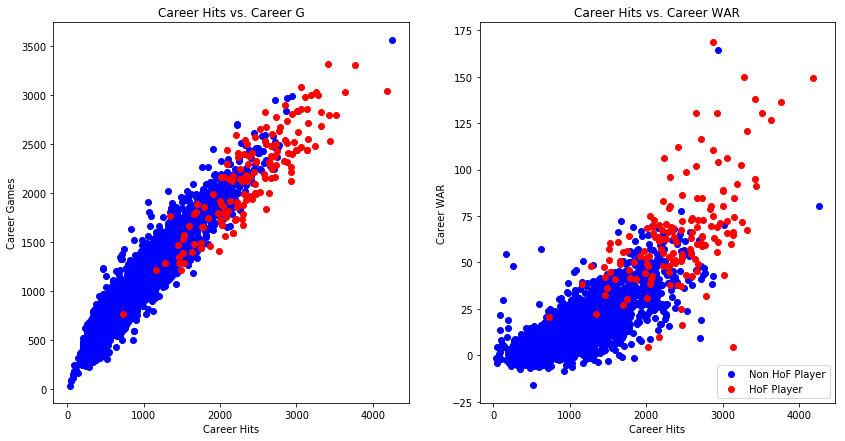

In [31]:
# Initialize the figure and add subplots
fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# Create Scatter plots for Hits vs. Average and Home Runs vs. Average
ax1.scatter(nothof_reduct['Career Stats H'], nothof_reduct['Career Stats G'], c='b', label='Non HoF Player')
ax1.scatter(hof_reduct['Career Stats H'], hof_reduct['Career Stats G'], c='r', label='HoF Player')
ax1.set_title('Career Hits vs. Career G')
ax1.set_xlabel('Career Hits')
ax1.set_ylabel('Career Games')
ax2.scatter(nothof_reduct['Career Stats H'], nothof_reduct['WAR'], c='b', label='Non HoF Player')
ax2.scatter(hof_reduct['Career Stats H'], hof_reduct['WAR'], c='r', label='HoF Player')
ax2.set_title('Career Hits vs. Career WAR')
ax2.set_ylabel('Career WAR')
ax2.set_xlabel('Career Hits')
ax2.legend(loc='lower right', scatterpoints=1)

# Show the plot
plt.show()

In [32]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv=5, random_state=0, solver='lbfgs', max_iter=10000, class_weight='balanced').fit(data_frame, labels)

predictions_lr = clf.predict(data_frame)

In [33]:
clf.score(data_frame, labels)

0.9778776356723125

In [34]:
predictions_recent = clf.predict(recentdata_frame)
pr = np.asarray(np.where(np.isin(predictions_recent, 1)))
pr = pr[0]
print (len(pr))
recenthof = recentdata.iloc[pr,:]
recenthof = pd.merge(recenthof, people, on='playerID')
# recenthof[['Name']]

predictions_recent_probs = np.asarray(clf.predict_proba(recentdata_frame))
prpt = predictions_recent_probs[:,1]
ixs = np.asarray(np.nonzero(prpt > .5))[0]
recenthof['probs'] = prpt[prpt>.5]
recenthof[['Name', 'probs']]

12


,Name,probs
0,Adrian Beltre,0.999906
1,Carlos Beltran,0.998823
2,Jason Giambi,0.889027
3,Derek Jeter,1.000000
4,Joe Mauer,0.996124
5,Brian McCann,0.964518
6,Yadier Molina,0.763639
7,Buster Posey,0.996227
8,Albert Pujols,0.980307
9,Alex Rodriguez,1.000000


In [35]:
np_predictions_lr = np.asarray(predictions_lr)
np_labels = labels

In [36]:
diff = np_labels - np_predictions_lr
print (np.unique(diff))
fpix = np.asarray(np.where(np.isin(diff, -1)))
fnix = np.asarray(np.where(np.isin(diff, 1)))
fpix = fpix[0]
fnix = fnix[0]
fpframe = data.iloc[fpix,:]
fnframe = data.iloc[fnix,:]
fpframe = pd.merge(fpframe, people, on='playerID')
fnframe = pd.merge(fnframe, people, on='playerID')

[-1  0]


In [37]:
fnframe[['Name']]

,Name


In [38]:
fpframe[['Name']]

,Name
0,Moises Alou
1,Dick Bartell
2,Buddy Bell
3,Wally Berger
4,Barry Bonds
5,Ken Boyer
6,Smoky Burgess
7,Ron Cey
8,Cupid Childs
9,Lave Cross


Confusion matrix, without normalization
[[2678   64]
 [   0  151]]
Normalized confusion matrix
[[0.98 0.02]
 [0.   1.  ]]


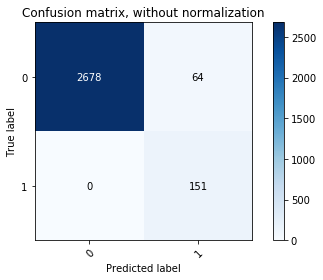

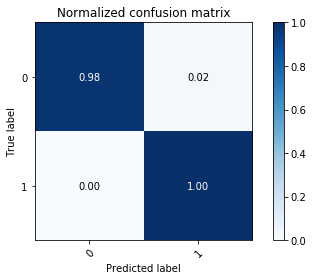

In [39]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    # classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(np_labels, np_predictions_lr, classes=[0,1],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(np_labels, np_predictions_lr, classes=[0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()


In [40]:
from sklearn.metrics import average_precision_score, accuracy_score, balanced_accuracy_score, hinge_loss, matthews_corrcoef, roc_auc_score, f1_score, hamming_loss, jaccard_similarity_score, log_loss, zero_one_loss
probs_lr = clf.predict_proba(data_frame)

probs_lr = probs_lr[:,1]

#average_precision_score(np_labels, probs_lr)
#accuracy_score(np_labels, predictions_lr)
balanced_accuracy_score(np_labels, predictions_lr)
hinge_loss(np_labels, predictions_lr)
matthews_corrcoef(np_labels, predictions_lr)
roc_auc_score(np_labels, probs_lr)
f1_score(np_labels, predictions_lr)
hamming_loss(np_labels, predictions_lr)
jaccard_similarity_score(np_labels, predictions_lr)
log_loss(np_labels, predictions_lr)
zero_one_loss(np_labels, predictions_lr)

0.02212236432768755

In [41]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='sgd', activation='relu', learning_rate='adaptive', alpha=1e-1, max_iter=500, 
                   hidden_layer_sizes=(86,)*3, verbose=True).fit(data_frame, labels)

Iteration 1, loss = 0.81266274
Iteration 2, loss = 0.62079287
Iteration 3, loss = 0.50487521
Iteration 4, loss = 0.44212887
Iteration 5, loss = 0.40150771
Iteration 6, loss = 0.37233094
Iteration 7, loss = 0.34875752
Iteration 8, loss = 0.32879672
Iteration 9, loss = 0.31123253
Iteration 10, loss = 0.29612292
Iteration 11, loss = 0.28233905
Iteration 12, loss = 0.27037229
Iteration 13, loss = 0.25974210
Iteration 14, loss = 0.24991172
Iteration 15, loss = 0.24134286
Iteration 16, loss = 0.23345652
Iteration 17, loss = 0.22647618
Iteration 18, loss = 0.22017027
Iteration 19, loss = 0.21429309
Iteration 20, loss = 0.20905702
Iteration 21, loss = 0.20429175
Iteration 22, loss = 0.19978743
Iteration 23, loss = 0.19572359
Iteration 24, loss = 0.19189840
Iteration 25, loss = 0.18840231
Iteration 26, loss = 0.18510045
Iteration 27, loss = 0.18211823
Iteration 28, loss = 0.17920071
Iteration 29, loss = 0.17651545
Iteration 30, loss = 0.17399010
Iteration 31, loss = 0.17152373
Iteration 32, los

Iteration 256, loss = 0.09361231
Iteration 257, loss = 0.09351677
Iteration 258, loss = 0.09340411
Iteration 259, loss = 0.09331049
Iteration 260, loss = 0.09319857
Iteration 261, loss = 0.09313886
Iteration 262, loss = 0.09305015
Iteration 263, loss = 0.09292307
Iteration 264, loss = 0.09282642
Iteration 265, loss = 0.09274690
Iteration 266, loss = 0.09263045
Iteration 267, loss = 0.09254574
Iteration 268, loss = 0.09245295
Iteration 269, loss = 0.09240982
Iteration 270, loss = 0.09225561
Iteration 271, loss = 0.09218296
Iteration 272, loss = 0.09207319
Iteration 273, loss = 0.09196596
Iteration 274, loss = 0.09186232
Iteration 275, loss = 0.09179720
Iteration 276, loss = 0.09166233
Iteration 277, loss = 0.09160393
Iteration 278, loss = 0.09150441
Iteration 279, loss = 0.09146157
Iteration 280, loss = 0.09128928
Iteration 281, loss = 0.09125745
Iteration 282, loss = 0.09111213
Iteration 283, loss = 0.09103033
Iteration 284, loss = 0.09094699
Iteration 285, loss = 0.09087728
Iteration 

In [79]:
from sklearn.neural_network import MLPClassifier
#nn = MLPClassifier(solver='lbfgs', activation='logistic', learning_rate='adaptive', alpha=1e-5, hidden_layer_sizes=t, verbose=True)

numparams = len(data_frame.columns)
parameter_space = {
    'activation' : ['logistic', 'relu', 'tanh'],
    'hidden_layer_sizes': [(numparams,), (numparams,)*3, (numparams,)*5, (int(numparams/2),), (int(numparams/2),)*3,
                          (int(numparams/2),)*5, (int(numparams*2),), (int(numparams*2),)*3, (int(numparams*2),)*5],
    'alpha': [10, 1e-1]
}
mlp = MLPClassifier(solver='sgd', activation='logistic', max_iter = 2000, learning_rate_init = 0.5, tol=1e-5, verbose=True)

In [80]:
from sklearn.model_selection import GridSearchCV

nn = GridSearchCV(mlp, parameter_space, cv=5)
nn.fit(data_frame, labels)

Iteration 1, loss = 0.59971472
Iteration 2, loss = 0.21905573
Iteration 3, loss = 0.18097011
Iteration 4, loss = 0.17413719
Iteration 5, loss = 0.17183471
Iteration 6, loss = 0.17037846
Iteration 7, loss = 0.17048685
Iteration 8, loss = 0.16946222
Iteration 9, loss = 0.17075919
Iteration 10, loss = 0.16840860
Iteration 11, loss = 0.17104573
Iteration 12, loss = 0.16890205
Iteration 13, loss = 0.17200373
Iteration 14, loss = 0.17035087
Iteration 15, loss = 0.17210469
Iteration 16, loss = 0.16899418
Iteration 17, loss = 0.16756993
Iteration 18, loss = 0.16977048
Iteration 19, loss = 0.16943000
Iteration 20, loss = 0.17247778
Iteration 21, loss = 0.16778039
Iteration 22, loss = 0.16945034
Iteration 23, loss = 0.16780127
Iteration 24, loss = 0.16807700
Iteration 25, loss = 0.16800758
Iteration 26, loss = 0.16897958
Iteration 27, loss = 0.16718986
Iteration 28, loss = 0.16763427
Iteration 29, loss = 0.16880243
Iteration 30, loss = 0.16698701
Iteration 31, loss = 0.16818615
Iteration 32, los

Iteration 1, loss = 1.87876088
Iteration 2, loss = 0.43735280
Iteration 3, loss = 0.24869702
Iteration 4, loss = 0.22039417
Iteration 5, loss = 0.20919979
Iteration 6, loss = 0.20750410
Iteration 7, loss = 0.20645117
Iteration 8, loss = 0.20931917
Iteration 9, loss = 0.20633870
Iteration 10, loss = 0.20921372
Iteration 11, loss = 0.20996831
Iteration 12, loss = 0.21020858
Iteration 13, loss = 0.20873706
Iteration 14, loss = 0.20906683
Iteration 15, loss = 0.20991704
Iteration 16, loss = 0.20657684
Iteration 17, loss = 0.20808215
Iteration 18, loss = 0.20818755
Iteration 19, loss = 0.20620249
Iteration 20, loss = 0.20909559
Iteration 21, loss = 0.20581103
Iteration 22, loss = 0.20753525
Iteration 23, loss = 0.20716451
Iteration 24, loss = 0.20831716
Iteration 25, loss = 0.20823636
Iteration 26, loss = 0.20820064
Iteration 27, loss = 0.20809656
Iteration 28, loss = 0.20592793
Iteration 29, loss = 0.20795209
Iteration 30, loss = 0.20853293
Iteration 31, loss = 0.20713686
Iteration 32, los

Iteration 27, loss = 0.17051925
Iteration 28, loss = 0.17028547
Iteration 29, loss = 0.17031776
Iteration 30, loss = 0.16950576
Iteration 31, loss = 0.17140809
Iteration 32, loss = 0.16984045
Iteration 33, loss = 0.17071742
Iteration 34, loss = 0.16905216
Iteration 35, loss = 0.16942515
Iteration 36, loss = 0.16937050
Iteration 37, loss = 0.16972796
Iteration 38, loss = 0.16900247
Iteration 39, loss = 0.16960928
Iteration 40, loss = 0.16870250
Iteration 41, loss = 0.16941900
Iteration 42, loss = 0.16835703
Iteration 43, loss = 0.17007550
Iteration 44, loss = 0.16886280
Iteration 45, loss = 0.16907051
Iteration 46, loss = 0.16985060
Iteration 47, loss = 0.16968408
Iteration 48, loss = 0.16945649
Iteration 49, loss = 0.16868059
Iteration 50, loss = 0.16848467
Iteration 51, loss = 0.17122500
Iteration 52, loss = 0.16935427
Iteration 53, loss = 0.16948997
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.74158230
Iteration 2, lo

Iteration 8, loss = 0.17366224
Iteration 9, loss = 0.17412004
Iteration 10, loss = 0.17471731
Iteration 11, loss = 0.17207934
Iteration 12, loss = 0.17288069
Iteration 13, loss = 0.17201339
Iteration 14, loss = 0.17211690
Iteration 15, loss = 0.17240264
Iteration 16, loss = 0.17192367
Iteration 17, loss = 0.17191464
Iteration 18, loss = 0.17136989
Iteration 19, loss = 0.17086805
Iteration 20, loss = 0.17290940
Iteration 21, loss = 0.17074773
Iteration 22, loss = 0.17053066
Iteration 23, loss = 0.17143833
Iteration 24, loss = 0.17016636
Iteration 25, loss = 0.17072664
Iteration 26, loss = 0.17173238
Iteration 27, loss = 0.16991572
Iteration 28, loss = 0.17080711
Iteration 29, loss = 0.17080254
Iteration 30, loss = 0.16938045
Iteration 31, loss = 0.16954328
Iteration 32, loss = 0.16984263
Iteration 33, loss = 0.16982104
Iteration 34, loss = 0.16980744
Iteration 35, loss = 0.16920485
Iteration 36, loss = 0.16875867
Iteration 37, loss = 0.17046472
Iteration 38, loss = 0.16995320
Iteration 

Iteration 39, loss = 0.20753622
Iteration 40, loss = 0.20703799
Iteration 41, loss = 0.20977709
Iteration 42, loss = 0.20595223
Iteration 43, loss = 0.20615075
Iteration 44, loss = 0.20960677
Iteration 45, loss = 0.20763659
Iteration 46, loss = 0.20709763
Iteration 47, loss = 0.20700436
Iteration 48, loss = 0.20718772
Iteration 49, loss = 0.20645141
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.33019829
Iteration 2, loss = 0.33819598
Iteration 3, loss = 0.23192275
Iteration 4, loss = 0.21359195
Iteration 5, loss = 0.20830840
Iteration 6, loss = 0.20693655
Iteration 7, loss = 0.20662080
Iteration 8, loss = 0.20586684
Iteration 9, loss = 0.20698102
Iteration 10, loss = 0.20703071
Iteration 11, loss = 0.20649798
Iteration 12, loss = 0.20730615
Iteration 13, loss = 0.20639466
Iteration 14, loss = 0.20785599
Iteration 15, loss = 0.20784479
Iteration 16, loss = 0.20673873
Iteration 17, loss = 0.20782942
Iteration 18, loss = 0.

Iteration 5, loss = 0.21896420
Iteration 6, loss = 0.20956102
Iteration 7, loss = 0.23369685
Iteration 8, loss = 0.21319852
Iteration 9, loss = 0.22143854
Iteration 10, loss = 0.22341642
Iteration 11, loss = 0.22933409
Iteration 12, loss = 0.24956659
Iteration 13, loss = 0.22028865
Iteration 14, loss = 0.22165397
Iteration 15, loss = 0.20933777
Iteration 16, loss = 0.20901083
Iteration 17, loss = 0.23924345
Iteration 18, loss = 0.21279640
Iteration 19, loss = 0.20901270
Iteration 20, loss = 0.21767866
Iteration 21, loss = 0.22767515
Iteration 22, loss = 0.20876029
Iteration 23, loss = 0.22484349
Iteration 24, loss = 0.22376077
Iteration 25, loss = 0.23331985
Iteration 26, loss = 0.20746954
Iteration 27, loss = 0.21090837
Iteration 28, loss = 0.20624972
Iteration 29, loss = 0.20698422
Iteration 30, loss = 0.20696567
Iteration 31, loss = 0.21009533
Iteration 32, loss = 0.21325755
Iteration 33, loss = 0.23444439
Iteration 34, loss = 0.21182469
Iteration 35, loss = 0.20697959
Iteration 36,

Iteration 29, loss = 0.20891126
Iteration 30, loss = 0.21058758
Iteration 31, loss = 0.21296801
Iteration 32, loss = 0.21586736
Iteration 33, loss = 0.21238554
Iteration 34, loss = 0.20771045
Iteration 35, loss = 0.20607279
Iteration 36, loss = 0.21090444
Iteration 37, loss = 0.21663800
Iteration 38, loss = 0.21288900
Iteration 39, loss = 0.21500789
Iteration 40, loss = 0.20685033
Iteration 41, loss = 0.20776018
Iteration 42, loss = 0.21561834
Iteration 43, loss = 0.20830076
Iteration 44, loss = 0.20684306
Iteration 45, loss = 0.20753480
Iteration 46, loss = 0.22644214
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 4.32025746
Iteration 2, loss = 0.77420014
Iteration 3, loss = 1.14343628
Iteration 4, loss = 0.84229784
Iteration 5, loss = 0.29715948
Iteration 6, loss = 0.24047583
Iteration 7, loss = 0.25595367
Iteration 8, loss = 0.21504682
Iteration 9, loss = 0.21497525
Iteration 10, loss = 0.21007904
Iteration 11, loss = 0.

Iteration 85, loss = 0.03801712
Iteration 86, loss = 0.03727619
Iteration 87, loss = 0.03740485
Iteration 88, loss = 0.03798040
Iteration 89, loss = 0.03717869
Iteration 90, loss = 0.03898411
Iteration 91, loss = 0.03831967
Iteration 92, loss = 0.03795168
Iteration 93, loss = 0.03740548
Iteration 94, loss = 0.03760162
Iteration 95, loss = 0.03725501
Iteration 96, loss = 0.03789079
Iteration 97, loss = 0.03710294
Iteration 98, loss = 0.03714106
Iteration 99, loss = 0.03650427
Iteration 100, loss = 0.03673267
Iteration 101, loss = 0.03716959
Iteration 102, loss = 0.03686403
Iteration 103, loss = 0.03767928
Iteration 104, loss = 0.03619210
Iteration 105, loss = 0.03695299
Iteration 106, loss = 0.03684642
Iteration 107, loss = 0.03737487
Iteration 108, loss = 0.03749247
Iteration 109, loss = 0.03644599
Iteration 110, loss = 0.03673915
Iteration 111, loss = 0.03664157
Iteration 112, loss = 0.03593009
Iteration 113, loss = 0.03661050
Iteration 114, loss = 0.03644006
Iteration 115, loss = 0.0

Iteration 90, loss = 0.03564585
Iteration 91, loss = 0.03543937
Iteration 92, loss = 0.03575010
Iteration 93, loss = 0.03641858
Iteration 94, loss = 0.03568786
Iteration 95, loss = 0.03593961
Iteration 96, loss = 0.03646072
Iteration 97, loss = 0.03622873
Iteration 98, loss = 0.03565522
Iteration 99, loss = 0.03551323
Iteration 100, loss = 0.03534230
Iteration 101, loss = 0.03646299
Iteration 102, loss = 0.03599199
Iteration 103, loss = 0.03525748
Iteration 104, loss = 0.03584791
Iteration 105, loss = 0.03520354
Iteration 106, loss = 0.03488859
Iteration 107, loss = 0.03566677
Iteration 108, loss = 0.03518925
Iteration 109, loss = 0.03572599
Iteration 110, loss = 0.03536431
Iteration 111, loss = 0.03512000
Iteration 112, loss = 0.03471182
Iteration 113, loss = 0.03504332
Iteration 114, loss = 0.03573156
Iteration 115, loss = 0.03562183
Iteration 116, loss = 0.03552834
Iteration 117, loss = 0.03506126
Iteration 118, loss = 0.03474160
Iteration 119, loss = 0.03446281
Iteration 120, loss 

Iteration 58, loss = 0.05564314
Iteration 59, loss = 0.05456780
Iteration 60, loss = 0.05551669
Iteration 61, loss = 0.05347341
Iteration 62, loss = 0.05375846
Iteration 63, loss = 0.05407884
Iteration 64, loss = 0.05370536
Iteration 65, loss = 0.05431863
Iteration 66, loss = 0.05203677
Iteration 67, loss = 0.05335646
Iteration 68, loss = 0.05133389
Iteration 69, loss = 0.05336553
Iteration 70, loss = 0.05332424
Iteration 71, loss = 0.05215505
Iteration 72, loss = 0.05300358
Iteration 73, loss = 0.05101061
Iteration 74, loss = 0.05196539
Iteration 75, loss = 0.05204799
Iteration 76, loss = 0.05174752
Iteration 77, loss = 0.05199795
Iteration 78, loss = 0.05132173
Iteration 79, loss = 0.05350882
Iteration 80, loss = 0.05222088
Iteration 81, loss = 0.05158896
Iteration 82, loss = 0.05026010
Iteration 83, loss = 0.05210676
Iteration 84, loss = 0.05075339
Iteration 85, loss = 0.05218704
Iteration 86, loss = 0.05121410
Iteration 87, loss = 0.05000024
Iteration 88, loss = 0.04994095
Iteratio

Iteration 31, loss = 0.06417941
Iteration 32, loss = 0.06263799
Iteration 33, loss = 0.06307984
Iteration 34, loss = 0.06282668
Iteration 35, loss = 0.06260118
Iteration 36, loss = 0.06219848
Iteration 37, loss = 0.06194527
Iteration 38, loss = 0.06174943
Iteration 39, loss = 0.06039865
Iteration 40, loss = 0.06013867
Iteration 41, loss = 0.05899260
Iteration 42, loss = 0.05906492
Iteration 43, loss = 0.05978099
Iteration 44, loss = 0.05912059
Iteration 45, loss = 0.05759902
Iteration 46, loss = 0.05759120
Iteration 47, loss = 0.05796511
Iteration 48, loss = 0.05709876
Iteration 49, loss = 0.05689239
Iteration 50, loss = 0.05726050
Iteration 51, loss = 0.05926157
Iteration 52, loss = 0.05823511
Iteration 53, loss = 0.05603694
Iteration 54, loss = 0.05808041
Iteration 55, loss = 0.05540337
Iteration 56, loss = 0.05551076
Iteration 57, loss = 0.05566148
Iteration 58, loss = 0.05518546
Iteration 59, loss = 0.05556613
Iteration 60, loss = 0.05484518
Iteration 61, loss = 0.05440089
Iteratio

Iteration 98, loss = 0.05121676
Iteration 99, loss = 0.05122722
Iteration 100, loss = 0.05162143
Iteration 101, loss = 0.05053913
Iteration 102, loss = 0.05330302
Iteration 103, loss = 0.05149289
Iteration 104, loss = 0.05240096
Iteration 105, loss = 0.05391814
Iteration 106, loss = 0.05121551
Iteration 107, loss = 0.05094831
Iteration 108, loss = 0.05179527
Iteration 109, loss = 0.05052108
Iteration 110, loss = 0.05218932
Iteration 111, loss = 0.05049209
Iteration 112, loss = 0.05050907
Iteration 113, loss = 0.05054520
Iteration 114, loss = 0.05144417
Iteration 115, loss = 0.05047647
Iteration 116, loss = 0.04987834
Iteration 117, loss = 0.05055265
Iteration 118, loss = 0.04966578
Iteration 119, loss = 0.04971078
Iteration 120, loss = 0.05063609
Iteration 121, loss = 0.05011027
Iteration 122, loss = 0.05077139
Iteration 123, loss = 0.04977340
Iteration 124, loss = 0.05041643
Iteration 125, loss = 0.05043932
Iteration 126, loss = 0.05176432
Iteration 127, loss = 0.04999889
Iteration 12

Iteration 37, loss = 0.21191030
Iteration 38, loss = 0.21061808
Iteration 39, loss = 0.21033326
Iteration 40, loss = 0.21025379
Iteration 41, loss = 0.21074973
Iteration 42, loss = 0.21166712
Iteration 43, loss = 0.21049235
Iteration 44, loss = 0.20951753
Iteration 45, loss = 0.20940959
Iteration 46, loss = 0.21085494
Iteration 47, loss = 0.20943896
Iteration 48, loss = 0.20874773
Iteration 49, loss = 0.20921397
Iteration 50, loss = 0.20916495
Iteration 51, loss = 0.20875782
Iteration 52, loss = 0.20950820
Iteration 53, loss = 0.20818902
Iteration 54, loss = 0.20796419
Iteration 55, loss = 0.20822678
Iteration 56, loss = 0.20767582
Iteration 57, loss = 0.20818212
Iteration 58, loss = 0.20729496
Iteration 59, loss = 0.20858431
Iteration 60, loss = 0.20851191
Iteration 61, loss = 0.20773048
Iteration 62, loss = 0.20708403
Iteration 63, loss = 0.20907288
Iteration 64, loss = 0.20804865
Iteration 65, loss = 0.20770570
Iteration 66, loss = 0.20801231
Iteration 67, loss = 0.20717868
Iteratio

Iteration 9, loss = 0.06896299
Iteration 10, loss = 0.06616089
Iteration 11, loss = 0.06285460
Iteration 12, loss = 0.06090044
Iteration 13, loss = 0.05838846
Iteration 14, loss = 0.05657468
Iteration 15, loss = 0.05624359
Iteration 16, loss = 0.05345205
Iteration 17, loss = 0.05150047
Iteration 18, loss = 0.05036794
Iteration 19, loss = 0.04870408
Iteration 20, loss = 0.04844382
Iteration 21, loss = 0.04733917
Iteration 22, loss = 0.04692368
Iteration 23, loss = 0.04585789
Iteration 24, loss = 0.04592155
Iteration 25, loss = 0.04507396
Iteration 26, loss = 0.04409805
Iteration 27, loss = 0.04322606
Iteration 28, loss = 0.04328618
Iteration 29, loss = 0.04268195
Iteration 30, loss = 0.04211153
Iteration 31, loss = 0.04187614
Iteration 32, loss = 0.04187311
Iteration 33, loss = 0.04194431
Iteration 34, loss = 0.04105423
Iteration 35, loss = 0.04083650
Iteration 36, loss = 0.04047622
Iteration 37, loss = 0.04083768
Iteration 38, loss = 0.04017076
Iteration 39, loss = 0.04052131
Iteration

Iteration 89, loss = 0.03272171
Iteration 90, loss = 0.03308270
Iteration 91, loss = 0.03241266
Iteration 92, loss = 0.03253435
Iteration 93, loss = 0.03374267
Iteration 94, loss = 0.03268378
Iteration 95, loss = 0.03278082
Iteration 96, loss = 0.03266310
Iteration 97, loss = 0.03307243
Iteration 98, loss = 0.03256520
Iteration 99, loss = 0.03285903
Iteration 100, loss = 0.03309668
Iteration 101, loss = 0.03287717
Iteration 102, loss = 0.03263171
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.26823898
Iteration 2, loss = 0.12269345
Iteration 3, loss = 0.11364318
Iteration 4, loss = 0.09806046
Iteration 5, loss = 0.08830708
Iteration 6, loss = 0.07960778
Iteration 7, loss = 0.07370564
Iteration 8, loss = 0.07031809
Iteration 9, loss = 0.06534317
Iteration 10, loss = 0.06160466
Iteration 11, loss = 0.05782276
Iteration 12, loss = 0.05615767
Iteration 13, loss = 0.05462098
Iteration 14, loss = 0.05204067
Iteration 15, loss =

Iteration 17, loss = 0.07025972
Iteration 18, loss = 0.07071911
Iteration 19, loss = 0.06822595
Iteration 20, loss = 0.06876182
Iteration 21, loss = 0.06613753
Iteration 22, loss = 0.06534509
Iteration 23, loss = 0.06683430
Iteration 24, loss = 0.06405726
Iteration 25, loss = 0.06338028
Iteration 26, loss = 0.06226329
Iteration 27, loss = 0.06047976
Iteration 28, loss = 0.06328223
Iteration 29, loss = 0.05997406
Iteration 30, loss = 0.06012650
Iteration 31, loss = 0.05937622
Iteration 32, loss = 0.05870647
Iteration 33, loss = 0.05800264
Iteration 34, loss = 0.05747021
Iteration 35, loss = 0.05677143
Iteration 36, loss = 0.05779498
Iteration 37, loss = 0.05692209
Iteration 38, loss = 0.05631022
Iteration 39, loss = 0.05606236
Iteration 40, loss = 0.05636973
Iteration 41, loss = 0.05543797
Iteration 42, loss = 0.05477377
Iteration 43, loss = 0.05451803
Iteration 44, loss = 0.05533175
Iteration 45, loss = 0.05476007
Iteration 46, loss = 0.05414769
Iteration 47, loss = 0.05470211
Iteratio

Iteration 30, loss = 0.05062140
Iteration 31, loss = 0.04972368
Iteration 32, loss = 0.04858796
Iteration 33, loss = 0.04939583
Iteration 34, loss = 0.04815298
Iteration 35, loss = 0.04749945
Iteration 36, loss = 0.04719083
Iteration 37, loss = 0.04733549
Iteration 38, loss = 0.04601322
Iteration 39, loss = 0.04565676
Iteration 40, loss = 0.04718542
Iteration 41, loss = 0.04514720
Iteration 42, loss = 0.04618696
Iteration 43, loss = 0.04449617
Iteration 44, loss = 0.04500371
Iteration 45, loss = 0.04383991
Iteration 46, loss = 0.04450363
Iteration 47, loss = 0.04476624
Iteration 48, loss = 0.04394000
Iteration 49, loss = 0.04446206
Iteration 50, loss = 0.04494844
Iteration 51, loss = 0.04272051
Iteration 52, loss = 0.04402970
Iteration 53, loss = 0.04257702
Iteration 54, loss = 0.04309186
Iteration 55, loss = 0.04197777
Iteration 56, loss = 0.04218157
Iteration 57, loss = 0.04228451
Iteration 58, loss = 0.04270921
Iteration 59, loss = 0.04181751
Iteration 60, loss = 0.04223796
Iteratio

Iteration 46, loss = 0.05574369
Iteration 47, loss = 0.05461557
Iteration 48, loss = 0.05492536
Iteration 49, loss = 0.05475115
Iteration 50, loss = 0.05503499
Iteration 51, loss = 0.05601749
Iteration 52, loss = 0.05422666
Iteration 53, loss = 0.05444574
Iteration 54, loss = 0.05538663
Iteration 55, loss = 0.05338003
Iteration 56, loss = 0.05396672
Iteration 57, loss = 0.05376924
Iteration 58, loss = 0.05257157
Iteration 59, loss = 0.05251001
Iteration 60, loss = 0.05370740
Iteration 61, loss = 0.05250808
Iteration 62, loss = 0.05201012
Iteration 63, loss = 0.05245874
Iteration 64, loss = 0.05257522
Iteration 65, loss = 0.05220738
Iteration 66, loss = 0.05240562
Iteration 67, loss = 0.05256898
Iteration 68, loss = 0.05135482
Iteration 69, loss = 0.05093736
Iteration 70, loss = 0.05176678
Iteration 71, loss = 0.05193564
Iteration 72, loss = 0.05182435
Iteration 73, loss = 0.05159599
Iteration 74, loss = 0.05144323
Iteration 75, loss = 0.05105890
Iteration 76, loss = 0.05078792
Iteratio

Iteration 1, loss = 0.36310631
Iteration 2, loss = 0.23379208
Iteration 3, loss = 0.22612552
Iteration 4, loss = 0.22503419
Iteration 5, loss = 0.22311035
Iteration 6, loss = 0.22255968
Iteration 7, loss = 0.22192850
Iteration 8, loss = 0.22059713
Iteration 9, loss = 0.22045115
Iteration 10, loss = 0.21835900
Iteration 11, loss = 0.21836903
Iteration 12, loss = 0.21711105
Iteration 13, loss = 0.21639523
Iteration 14, loss = 0.21615709
Iteration 15, loss = 0.21507409
Iteration 16, loss = 0.21487597
Iteration 17, loss = 0.21437712
Iteration 18, loss = 0.21476301
Iteration 19, loss = 0.21308596
Iteration 20, loss = 0.21446290
Iteration 21, loss = 0.21463637
Iteration 22, loss = 0.21203280
Iteration 23, loss = 0.21145319
Iteration 24, loss = 0.21096565
Iteration 25, loss = 0.21187607
Iteration 26, loss = 0.21176335
Iteration 27, loss = 0.21014263
Iteration 28, loss = 0.21006911
Iteration 29, loss = 0.21080258
Iteration 30, loss = 0.21013891
Iteration 31, loss = 0.20966994
Iteration 32, los

Iteration 23, loss = 0.06239356
Iteration 24, loss = 0.05973576
Iteration 25, loss = 0.05787760
Iteration 26, loss = 0.05653346
Iteration 27, loss = 0.05539627
Iteration 28, loss = 0.05466428
Iteration 29, loss = 0.05320771
Iteration 30, loss = 0.05258139
Iteration 31, loss = 0.05104760
Iteration 32, loss = 0.04969304
Iteration 33, loss = 0.04895574
Iteration 34, loss = 0.04839302
Iteration 35, loss = 0.04924832
Iteration 36, loss = 0.04778396
Iteration 37, loss = 0.04666954
Iteration 38, loss = 0.04649938
Iteration 39, loss = 0.04706500
Iteration 40, loss = 0.04557007
Iteration 41, loss = 0.04446663
Iteration 42, loss = 0.04432933
Iteration 43, loss = 0.04443150
Iteration 44, loss = 0.04376483
Iteration 45, loss = 0.04317136
Iteration 46, loss = 0.04280420
Iteration 47, loss = 0.04313462
Iteration 48, loss = 0.04201770
Iteration 49, loss = 0.04265242
Iteration 50, loss = 0.04238193
Iteration 51, loss = 0.04219669
Iteration 52, loss = 0.04091942
Iteration 53, loss = 0.04077967
Iteratio

Iteration 80, loss = 0.03311830
Iteration 81, loss = 0.03407376
Iteration 82, loss = 0.03294151
Iteration 83, loss = 0.03313192
Iteration 84, loss = 0.03316982
Iteration 85, loss = 0.03284706
Iteration 86, loss = 0.03265858
Iteration 87, loss = 0.03207329
Iteration 88, loss = 0.03401598
Iteration 89, loss = 0.03279181
Iteration 90, loss = 0.03289263
Iteration 91, loss = 0.03329559
Iteration 92, loss = 0.03328858
Iteration 93, loss = 0.03231876
Iteration 94, loss = 0.03308299
Iteration 95, loss = 0.03279028
Iteration 96, loss = 0.03238337
Iteration 97, loss = 0.03339831
Iteration 98, loss = 0.03325736
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.61591688
Iteration 2, loss = 0.15639732
Iteration 3, loss = 0.16100255
Iteration 4, loss = 0.15258770
Iteration 5, loss = 0.13949062
Iteration 6, loss = 0.12813904
Iteration 7, loss = 0.11929547
Iteration 8, loss = 0.11088166
Iteration 9, loss = 0.10396766
Iteration 10, loss = 0.

Iteration 38, loss = 0.06434338
Iteration 39, loss = 0.06451835
Iteration 40, loss = 0.06348000
Iteration 41, loss = 0.06407641
Iteration 42, loss = 0.06464019
Iteration 43, loss = 0.06351693
Iteration 44, loss = 0.06193937
Iteration 45, loss = 0.06254073
Iteration 46, loss = 0.06180392
Iteration 47, loss = 0.06117989
Iteration 48, loss = 0.06089784
Iteration 49, loss = 0.06177759
Iteration 50, loss = 0.06100121
Iteration 51, loss = 0.06129520
Iteration 52, loss = 0.05996452
Iteration 53, loss = 0.06113349
Iteration 54, loss = 0.05916324
Iteration 55, loss = 0.06057472
Iteration 56, loss = 0.05986263
Iteration 57, loss = 0.05948821
Iteration 58, loss = 0.06131156
Iteration 59, loss = 0.05985251
Iteration 60, loss = 0.05864069
Iteration 61, loss = 0.05982593
Iteration 62, loss = 0.05870324
Iteration 63, loss = 0.05919015
Iteration 64, loss = 0.05804941
Iteration 65, loss = 0.05902906
Iteration 66, loss = 0.05827609
Iteration 67, loss = 0.05818354
Iteration 68, loss = 0.05708146
Iteratio

Iteration 8, loss = 0.13469797
Iteration 9, loss = 0.11820024
Iteration 10, loss = 0.10660443
Iteration 11, loss = 0.09965226
Iteration 12, loss = 0.09570582
Iteration 13, loss = 0.09114162
Iteration 14, loss = 0.08698549
Iteration 15, loss = 0.08428771
Iteration 16, loss = 0.08261399
Iteration 17, loss = 0.08024872
Iteration 18, loss = 0.07757683
Iteration 19, loss = 0.07701190
Iteration 20, loss = 0.07482474
Iteration 21, loss = 0.07333929
Iteration 22, loss = 0.07207358
Iteration 23, loss = 0.07054268
Iteration 24, loss = 0.07029668
Iteration 25, loss = 0.06830794
Iteration 26, loss = 0.06935651
Iteration 27, loss = 0.06699713
Iteration 28, loss = 0.06614949
Iteration 29, loss = 0.06691659
Iteration 30, loss = 0.06562540
Iteration 31, loss = 0.06496711
Iteration 32, loss = 0.06339313
Iteration 33, loss = 0.06192752
Iteration 34, loss = 0.06212700
Iteration 35, loss = 0.06109494
Iteration 36, loss = 0.06098890
Iteration 37, loss = 0.06050889
Iteration 38, loss = 0.06021314
Iteration 

Iteration 137, loss = 0.05292767
Iteration 138, loss = 0.05273942
Iteration 139, loss = 0.05298763
Iteration 140, loss = 0.05211290
Iteration 141, loss = 0.05342217
Iteration 142, loss = 0.05373794
Iteration 143, loss = 0.05403600
Iteration 144, loss = 0.05271896
Iteration 145, loss = 0.05240124
Iteration 146, loss = 0.05181211
Iteration 147, loss = 0.05147044
Iteration 148, loss = 0.05146223
Iteration 149, loss = 0.05139547
Iteration 150, loss = 0.05213745
Iteration 151, loss = 0.05105424
Iteration 152, loss = 0.05192708
Iteration 153, loss = 0.05161140
Iteration 154, loss = 0.05308511
Iteration 155, loss = 0.05189642
Iteration 156, loss = 0.05235437
Iteration 157, loss = 0.05330001
Iteration 158, loss = 0.05152724
Iteration 159, loss = 0.05098143
Iteration 160, loss = 0.05222377
Iteration 161, loss = 0.05036443
Iteration 162, loss = 0.05077960
Iteration 163, loss = 0.05307230
Iteration 164, loss = 0.05022556
Iteration 165, loss = 0.05208735
Iteration 166, loss = 0.05246572
Iteration 

Iteration 12, loss = 0.29494659
Iteration 13, loss = 0.28950274
Iteration 14, loss = 0.28388274
Iteration 15, loss = 0.27908240
Iteration 16, loss = 0.27459021
Iteration 17, loss = 0.27002383
Iteration 18, loss = 0.26579393
Iteration 19, loss = 0.26201994
Iteration 20, loss = 0.25842658
Iteration 21, loss = 0.25574187
Iteration 22, loss = 0.25245583
Iteration 23, loss = 0.24939824
Iteration 24, loss = 0.24677447
Iteration 25, loss = 0.24491771
Iteration 26, loss = 0.24185395
Iteration 27, loss = 0.23958306
Iteration 28, loss = 0.23752597
Iteration 29, loss = 0.23573701
Iteration 30, loss = 0.23483870
Iteration 31, loss = 0.23276586
Iteration 32, loss = 0.23081738
Iteration 33, loss = 0.22966994
Iteration 34, loss = 0.22850994
Iteration 35, loss = 0.22709457
Iteration 36, loss = 0.22622562
Iteration 37, loss = 0.22615254
Iteration 38, loss = 0.22682617
Iteration 39, loss = 0.22241585
Iteration 40, loss = 0.22232307
Iteration 41, loss = 0.22108467
Iteration 42, loss = 0.22033167
Iteratio

Iteration 61, loss = 0.21009096
Iteration 62, loss = 0.20892638
Iteration 63, loss = 0.20998263
Iteration 64, loss = 0.20943511
Iteration 65, loss = 0.21073974
Iteration 66, loss = 0.20838164
Iteration 67, loss = 0.21040596
Iteration 68, loss = 0.20853821
Iteration 69, loss = 0.21111109
Iteration 70, loss = 0.20881786
Iteration 71, loss = 0.20924475
Iteration 72, loss = 0.20795836
Iteration 73, loss = 0.20824966
Iteration 74, loss = 0.20815764
Iteration 75, loss = 0.20774898
Iteration 76, loss = 0.20750955
Iteration 77, loss = 0.20780265
Iteration 78, loss = 0.20782820
Iteration 79, loss = 0.20792332
Iteration 80, loss = 0.20733219
Iteration 81, loss = 0.20768289
Iteration 82, loss = 0.20762513
Iteration 83, loss = 0.21145124
Iteration 84, loss = 0.20692068
Iteration 85, loss = 0.20760422
Iteration 86, loss = 0.20778846
Iteration 87, loss = 0.20789920
Iteration 88, loss = 0.20667251
Iteration 89, loss = 0.20980855
Iteration 90, loss = 0.20822187
Iteration 91, loss = 0.20788470
Iteratio

Iteration 4, loss = 0.14340121
Iteration 5, loss = 0.12201159
Iteration 6, loss = 0.12719511
Iteration 7, loss = 0.13609420
Iteration 8, loss = 0.13607830
Iteration 9, loss = 0.12863630
Iteration 10, loss = 0.13470735
Iteration 11, loss = 0.11820859
Iteration 12, loss = 0.13968068
Iteration 13, loss = 0.12420946
Iteration 14, loss = 0.13040994
Iteration 15, loss = 0.12233834
Iteration 16, loss = 0.13211135
Iteration 17, loss = 0.13042366
Iteration 18, loss = 0.11570814
Iteration 19, loss = 0.12464957
Iteration 20, loss = 0.12009198
Iteration 21, loss = 0.13684596
Iteration 22, loss = 0.12827883
Iteration 23, loss = 0.12671095
Iteration 24, loss = 0.12770963
Iteration 25, loss = 0.12304130
Iteration 26, loss = 0.12155001
Iteration 27, loss = 0.12090920
Iteration 28, loss = 0.11934282
Iteration 29, loss = 0.11418158
Iteration 30, loss = 0.13034450
Iteration 31, loss = 0.12105686
Iteration 32, loss = 0.11669550
Iteration 33, loss = 0.12561460
Iteration 34, loss = 0.13021810
Iteration 35, 

Iteration 9, loss = 0.20654657
Iteration 10, loss = 0.20582823
Iteration 11, loss = 0.20598100
Iteration 12, loss = 0.20586115
Iteration 13, loss = 0.20705691
Iteration 14, loss = 0.20674739
Iteration 15, loss = 0.20559647
Iteration 16, loss = 0.20598730
Iteration 17, loss = 0.20576495
Iteration 18, loss = 0.20554538
Iteration 19, loss = 0.20580027
Iteration 20, loss = 0.20551995
Iteration 21, loss = 0.20555737
Iteration 22, loss = 0.20552748
Iteration 23, loss = 0.20557717
Iteration 24, loss = 0.20543167
Iteration 25, loss = 0.20537704
Iteration 26, loss = 0.20535981
Iteration 27, loss = 0.20541400
Iteration 28, loss = 0.20546678
Iteration 29, loss = 0.20572252
Iteration 30, loss = 0.20534931
Iteration 31, loss = 0.20541217
Iteration 32, loss = 0.20601703
Iteration 33, loss = 0.20571947
Iteration 34, loss = 0.20578035
Iteration 35, loss = 0.20601482
Iteration 36, loss = 0.20601383
Iteration 37, loss = 0.20552703
Iteration 38, loss = 0.20579256
Iteration 39, loss = 0.20574407
Iteration

Iteration 1, loss = 1.92392635
Iteration 2, loss = 0.40100743
Iteration 3, loss = 0.23500155
Iteration 4, loss = 0.18042966
Iteration 5, loss = 0.16627436
Iteration 6, loss = 0.17284802
Iteration 7, loss = 0.18567579
Iteration 8, loss = 0.17279073
Iteration 9, loss = 0.16433103
Iteration 10, loss = 0.16529172
Iteration 11, loss = 0.16843113
Iteration 12, loss = 0.16476722
Iteration 13, loss = 0.18250440
Iteration 14, loss = 0.17391336
Iteration 15, loss = 0.17369109
Iteration 16, loss = 0.16557578
Iteration 17, loss = 0.16441890
Iteration 18, loss = 0.16315873
Iteration 19, loss = 0.16998729
Iteration 20, loss = 0.16558000
Iteration 21, loss = 0.18044234
Iteration 22, loss = 0.17080038
Iteration 23, loss = 0.17746119
Iteration 24, loss = 0.19668776
Iteration 25, loss = 0.19793999
Iteration 26, loss = 0.16637990
Iteration 27, loss = 0.16222583
Iteration 28, loss = 0.16293665
Iteration 29, loss = 0.17932011
Iteration 30, loss = 0.17243344
Iteration 31, loss = 0.18511864
Iteration 32, los

Iteration 1, loss = 2.71176257
Iteration 2, loss = 0.50725899
Iteration 3, loss = 0.27176636
Iteration 4, loss = 0.22753206
Iteration 5, loss = 0.20734202
Iteration 6, loss = 0.20828695
Iteration 7, loss = 0.20627204
Iteration 8, loss = 0.20639165
Iteration 9, loss = 0.20866601
Iteration 10, loss = 0.20658968
Iteration 11, loss = 0.20805754
Iteration 12, loss = 0.20594423
Iteration 13, loss = 0.20739082
Iteration 14, loss = 0.20618543
Iteration 15, loss = 0.20550957
Iteration 16, loss = 0.20697618
Iteration 17, loss = 0.20553013
Iteration 18, loss = 0.20633927
Iteration 19, loss = 0.20822709
Iteration 20, loss = 0.20649416
Iteration 21, loss = 0.20594822
Iteration 22, loss = 0.20546864
Iteration 23, loss = 0.20671794
Iteration 24, loss = 0.20585905
Iteration 25, loss = 0.20593121
Iteration 26, loss = 0.20564578
Iteration 27, loss = 0.20550537
Iteration 28, loss = 0.20524169
Iteration 29, loss = 0.20550681
Iteration 30, loss = 0.20708780
Iteration 31, loss = 0.20571811
Iteration 32, los

Iteration 19, loss = 0.20841923
Iteration 20, loss = 0.20690467
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 5.20895543
Iteration 2, loss = 0.76670494
Iteration 3, loss = 0.30102726
Iteration 4, loss = 0.21508295
Iteration 5, loss = 0.20498272
Iteration 6, loss = 0.17796396
Iteration 7, loss = 0.16898475
Iteration 8, loss = 0.16494468
Iteration 9, loss = 0.17325710
Iteration 10, loss = 0.16588360
Iteration 11, loss = 0.17754387
Iteration 12, loss = 0.16452500
Iteration 13, loss = 0.16495212
Iteration 14, loss = 0.16317295
Iteration 15, loss = 0.17150021
Iteration 16, loss = 0.17279277
Iteration 17, loss = 0.17261912
Iteration 18, loss = 0.16788932
Iteration 19, loss = 0.16414130
Iteration 20, loss = 0.17244725
Iteration 21, loss = 0.18540709
Iteration 22, loss = 0.16833683
Iteration 23, loss = 0.17154468
Iteration 24, loss = 0.16870388
Iteration 25, loss = 0.17868801
Training loss did not improve more than tol=0.000010 fo

Iteration 12, loss = 0.05208591
Iteration 13, loss = 0.04875745
Iteration 14, loss = 0.04567364
Iteration 15, loss = 0.04246139
Iteration 16, loss = 0.04332521
Iteration 17, loss = 0.03811283
Iteration 18, loss = 0.03622801
Iteration 19, loss = 0.03298870
Iteration 20, loss = 0.03201050
Iteration 21, loss = 0.02968679
Iteration 22, loss = 0.02799679
Iteration 23, loss = 0.02694687
Iteration 24, loss = 0.02686253
Iteration 25, loss = 0.02538001
Iteration 26, loss = 0.02417204
Iteration 27, loss = 0.02313620
Iteration 28, loss = 0.02275827
Iteration 29, loss = 0.02180535
Iteration 30, loss = 0.02157771
Iteration 31, loss = 0.02082104
Iteration 32, loss = 0.02073611
Iteration 33, loss = 0.02044780
Iteration 34, loss = 0.01933518
Iteration 35, loss = 0.01940045
Iteration 36, loss = 0.01937435
Iteration 37, loss = 0.01903687
Iteration 38, loss = 0.01870704
Iteration 39, loss = 0.01777125
Iteration 40, loss = 0.01717741
Iteration 41, loss = 0.01778382
Iteration 42, loss = 0.01726948
Iteratio

Iteration 84, loss = 0.05073900
Iteration 85, loss = 0.04266774
Iteration 86, loss = 0.03397397
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.28098163
Iteration 2, loss = 0.27565231
Iteration 3, loss = 0.16774985
Iteration 4, loss = 0.15131525
Iteration 5, loss = 0.14001401
Iteration 6, loss = 0.13915626
Iteration 7, loss = 0.12817523
Iteration 8, loss = 0.11287181
Iteration 9, loss = 0.10204290
Iteration 10, loss = 0.13077374
Iteration 11, loss = 0.10591966
Iteration 12, loss = 0.09219504
Iteration 13, loss = 0.08940807
Iteration 14, loss = 0.07590741
Iteration 15, loss = 0.07806197
Iteration 16, loss = 0.09586954
Iteration 17, loss = 0.09146473
Iteration 18, loss = 0.07703233
Iteration 19, loss = 0.07447650
Iteration 20, loss = 0.07083689
Iteration 21, loss = 0.07549300
Iteration 22, loss = 0.06019860
Iteration 23, loss = 0.06386798
Iteration 24, loss = 0.05753976
Iteration 25, loss = 0.05274575
Iteration 26, loss = 0.

Iteration 61, loss = 0.02889844
Iteration 62, loss = 0.03508162
Iteration 63, loss = 0.04262508
Iteration 64, loss = 0.04942332
Iteration 65, loss = 0.03827200
Iteration 66, loss = 0.02935677
Iteration 67, loss = 0.02581211
Iteration 68, loss = 0.02420580
Iteration 69, loss = 0.02285483
Iteration 70, loss = 0.02161483
Iteration 71, loss = 0.02047102
Iteration 72, loss = 0.01942349
Iteration 73, loss = 0.01845421
Iteration 74, loss = 0.01756749
Iteration 75, loss = 0.01672707
Iteration 76, loss = 0.01595642
Iteration 77, loss = 0.01524536
Iteration 78, loss = 0.01458044
Iteration 79, loss = 0.01398932
Iteration 80, loss = 0.01339891
Iteration 81, loss = 0.01285408
Iteration 82, loss = 0.01239223
Iteration 83, loss = 0.01191396
Iteration 84, loss = 0.01152554
Iteration 85, loss = 0.01112305
Iteration 86, loss = 0.01076319
Iteration 87, loss = 0.01046958
Iteration 88, loss = 0.01009706
Iteration 89, loss = 0.00983579
Iteration 90, loss = 0.00958327
Iteration 91, loss = 0.00951343
Iteratio

Iteration 71, loss = 0.04650972
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.32843669
Iteration 2, loss = 0.22319551
Iteration 3, loss = 0.19119543
Iteration 4, loss = 0.17714765
Iteration 5, loss = 0.16023805
Iteration 6, loss = 0.14241604
Iteration 7, loss = 0.13019165
Iteration 8, loss = 0.12657378
Iteration 9, loss = 0.12313586
Iteration 10, loss = 0.10859121
Iteration 11, loss = 0.10606274
Iteration 12, loss = 0.10046597
Iteration 13, loss = 0.10857912
Iteration 14, loss = 0.09549875
Iteration 15, loss = 0.11192393
Iteration 16, loss = 0.07952216
Iteration 17, loss = 0.09536891
Iteration 18, loss = 0.09427724
Iteration 19, loss = 0.07106663
Iteration 20, loss = 0.10707737
Iteration 21, loss = 0.08541322
Iteration 22, loss = 0.07385893
Iteration 23, loss = 0.06925240
Iteration 24, loss = 0.06697188
Iteration 25, loss = 0.05911690
Iteration 26, loss = 0.05251145
Iteration 27, loss = 0.04993610
Iteration 28, loss = 0.

Iteration 9, loss = 0.06355419
Iteration 10, loss = 0.06076742
Iteration 11, loss = 0.05518830
Iteration 12, loss = 0.05263551
Iteration 13, loss = 0.05080587
Iteration 14, loss = 0.05096278
Iteration 15, loss = 0.04762974
Iteration 16, loss = 0.04755501
Iteration 17, loss = 0.04522551
Iteration 18, loss = 0.04580814
Iteration 19, loss = 0.04256386
Iteration 20, loss = 0.04093397
Iteration 21, loss = 0.03578546
Iteration 22, loss = 0.03295598
Iteration 23, loss = 0.03198056
Iteration 24, loss = 0.03689703
Iteration 25, loss = 0.03969447
Iteration 26, loss = 0.03891277
Iteration 27, loss = 0.04860643
Iteration 28, loss = 0.04717417
Iteration 29, loss = 0.04397166
Iteration 30, loss = 0.03995470
Iteration 31, loss = 0.03464861
Iteration 32, loss = 0.03194402
Iteration 33, loss = 0.03231423
Iteration 34, loss = 0.03074776
Iteration 35, loss = 0.02911411
Iteration 36, loss = 0.02773844
Iteration 37, loss = 0.02554885
Iteration 38, loss = 0.02477502
Iteration 39, loss = 0.02347640
Iteration

Iteration 5, loss = 0.10783671
Iteration 6, loss = 0.09878454
Iteration 7, loss = 0.09548989
Iteration 8, loss = 0.08700041
Iteration 9, loss = 0.08485298
Iteration 10, loss = 0.08291576
Iteration 11, loss = 0.07618732
Iteration 12, loss = 0.06849768
Iteration 13, loss = 0.06480845
Iteration 14, loss = 0.08027063
Iteration 15, loss = 0.06483389
Iteration 16, loss = 0.05519976
Iteration 17, loss = 0.07932318
Iteration 18, loss = 0.07428982
Iteration 19, loss = 0.07471986
Iteration 20, loss = 0.05790705
Iteration 21, loss = 0.04503687
Iteration 22, loss = 0.06233897
Iteration 23, loss = 0.06320008
Iteration 24, loss = 0.05431490
Iteration 25, loss = 0.04053040
Iteration 26, loss = 0.05368528
Iteration 27, loss = 0.04817558
Iteration 28, loss = 0.05672018
Iteration 29, loss = 0.05234257
Iteration 30, loss = 0.09357594
Iteration 31, loss = 0.05019126
Iteration 32, loss = 0.03757593
Iteration 33, loss = 0.07888425
Iteration 34, loss = 0.05896661
Iteration 35, loss = 0.04700955
Iteration 36,

Iteration 12, loss = 0.08227468
Iteration 13, loss = 0.07021971
Iteration 14, loss = 0.09673913
Iteration 15, loss = 0.09770608
Iteration 16, loss = 0.08433785
Iteration 17, loss = 0.07437165
Iteration 18, loss = 0.06016062
Iteration 19, loss = 0.05847574
Iteration 20, loss = 0.08331944
Iteration 21, loss = 0.08644648
Iteration 22, loss = 0.08230490
Iteration 23, loss = 0.06611131
Iteration 24, loss = 0.06913850
Iteration 25, loss = 0.05086813
Iteration 26, loss = 0.05419014
Iteration 27, loss = 0.06053901
Iteration 28, loss = 0.06727881
Iteration 29, loss = 0.04703215
Iteration 30, loss = 0.03908732
Iteration 31, loss = 0.08471431
Iteration 32, loss = 0.07195492
Iteration 33, loss = 0.05759993
Iteration 34, loss = 0.05830019
Iteration 35, loss = 0.04026890
Iteration 36, loss = 0.03565648
Iteration 37, loss = 0.05764990
Iteration 38, loss = 0.04960940
Iteration 39, loss = 0.03788175
Iteration 40, loss = 0.05256115
Iteration 41, loss = 0.05048849
Iteration 42, loss = 0.04117309
Iteratio

Iteration 44, loss = 0.05170695
Iteration 45, loss = 0.04160887
Iteration 46, loss = 0.04698150
Iteration 47, loss = 0.03856575
Iteration 48, loss = 0.03915727
Iteration 49, loss = 0.03989258
Iteration 50, loss = 0.05110202
Iteration 51, loss = 0.03973871
Iteration 52, loss = 0.04248764
Iteration 53, loss = 0.04217102
Iteration 54, loss = 0.04175591
Iteration 55, loss = 0.03852824
Iteration 56, loss = 0.03085802
Iteration 57, loss = 0.04911937
Iteration 58, loss = 0.08027208
Iteration 59, loss = 0.05762031
Iteration 60, loss = 0.04482131
Iteration 61, loss = 0.04630642
Iteration 62, loss = 0.04138184
Iteration 63, loss = 0.04227209
Iteration 64, loss = 0.03537107
Iteration 65, loss = 0.03226403
Iteration 66, loss = 0.04253997
Iteration 67, loss = 0.03586269
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.27586490
Iteration 2, loss = 0.12761297
Iteration 3, loss = 0.11010638
Iteration 4, loss = 0.09810959
Iteration 5, loss 

Iteration 4, loss = 0.09300074
Iteration 5, loss = 0.08754855
Iteration 6, loss = 0.07316861
Iteration 7, loss = 0.06446131
Iteration 8, loss = 0.05922840
Iteration 9, loss = 0.05465590
Iteration 10, loss = 0.04924718
Iteration 11, loss = 0.04819794
Iteration 12, loss = 0.04671063
Iteration 13, loss = 0.04328882
Iteration 14, loss = 0.04072753
Iteration 15, loss = 0.04128884
Iteration 16, loss = 0.06264861
Iteration 17, loss = 0.05079801
Iteration 18, loss = 0.04958789
Iteration 19, loss = 0.04963591
Iteration 20, loss = 0.04260247
Iteration 21, loss = 0.03931335
Iteration 22, loss = 0.03513458
Iteration 23, loss = 0.03304756
Iteration 24, loss = 0.03135421
Iteration 25, loss = 0.02991536
Iteration 26, loss = 0.02853261
Iteration 27, loss = 0.02722626
Iteration 28, loss = 0.02626944
Iteration 29, loss = 0.02529160
Iteration 30, loss = 0.02436668
Iteration 31, loss = 0.02352887
Iteration 32, loss = 0.02327244
Iteration 33, loss = 0.02200232
Iteration 34, loss = 0.02123863
Iteration 35, 

Iteration 9, loss = 0.10917431
Iteration 10, loss = 0.10439541
Iteration 11, loss = 0.10405158
Iteration 12, loss = 0.09851757
Iteration 13, loss = 0.10067621
Iteration 14, loss = 0.12319590
Iteration 15, loss = 0.09278360
Iteration 16, loss = 0.08400063
Iteration 17, loss = 0.08614380
Iteration 18, loss = 0.08343768
Iteration 19, loss = 0.08798843
Iteration 20, loss = 0.07070307
Iteration 21, loss = 0.07980991
Iteration 22, loss = 0.06708515
Iteration 23, loss = 0.06460618
Iteration 24, loss = 0.06084724
Iteration 25, loss = 0.05532496
Iteration 26, loss = 0.05687220
Iteration 27, loss = 0.06124469
Iteration 28, loss = 0.05431170
Iteration 29, loss = 0.04959283
Iteration 30, loss = 0.04790759
Iteration 31, loss = 0.04698089
Iteration 32, loss = 0.04761568
Iteration 33, loss = 0.04449569
Iteration 34, loss = 0.04111086
Iteration 35, loss = 0.03799045
Iteration 36, loss = 0.03673770
Iteration 37, loss = 0.03399560
Iteration 38, loss = 0.03745934
Iteration 39, loss = 0.03410499
Iteration

Iteration 57, loss = 0.04494852
Iteration 58, loss = 0.04095867
Iteration 59, loss = 0.04996750
Iteration 60, loss = 0.05457158
Iteration 61, loss = 0.04396492
Iteration 62, loss = 0.05889839
Iteration 63, loss = 0.05417310
Iteration 64, loss = 0.04630789
Iteration 65, loss = 0.04399780
Iteration 66, loss = 0.05025652
Iteration 67, loss = 0.04819556
Iteration 68, loss = 0.04288844
Iteration 69, loss = 0.03799584
Iteration 70, loss = 0.03491133
Iteration 71, loss = 0.03735148
Iteration 72, loss = 0.04559079
Iteration 73, loss = 0.04181485
Iteration 74, loss = 0.04057110
Iteration 75, loss = 0.03348111
Iteration 76, loss = 0.04066735
Iteration 77, loss = 0.04077289
Iteration 78, loss = 0.03917418
Iteration 79, loss = 0.03644110
Iteration 80, loss = 0.03195281
Iteration 81, loss = 0.04418251
Iteration 82, loss = 0.03967089
Iteration 83, loss = 0.04253434
Iteration 84, loss = 0.05454558
Iteration 85, loss = 0.04420567
Iteration 86, loss = 0.03686050
Iteration 87, loss = 0.03138296
Iteratio

Iteration 43, loss = 0.07284548
Iteration 44, loss = 0.05465705
Iteration 45, loss = 0.04391416
Iteration 46, loss = 0.04125454
Iteration 47, loss = 0.08349831
Iteration 48, loss = 0.07345900
Iteration 49, loss = 0.06212209
Iteration 50, loss = 0.07549930
Iteration 51, loss = 0.05818723
Iteration 52, loss = 0.04475765
Iteration 53, loss = 0.08063437
Iteration 54, loss = 0.08845834
Iteration 55, loss = 0.07749045
Iteration 56, loss = 0.05372828
Iteration 57, loss = 0.05045264
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.47919576
Iteration 2, loss = 0.41415063
Iteration 3, loss = 0.36941803
Iteration 4, loss = 0.33321416
Iteration 5, loss = 0.29606088
Iteration 6, loss = 0.30553294
Iteration 7, loss = 0.26821593
Iteration 8, loss = 0.24562511
Iteration 9, loss = 0.24289108
Iteration 10, loss = 0.27073382
Iteration 11, loss = 0.25361129
Iteration 12, loss = 0.21308975
Iteration 13, loss = 0.19075009
Iteration 14, loss = 0.

Iteration 1, loss = 3.03662302
Iteration 2, loss = 0.50019763
Iteration 3, loss = 0.24719736
Iteration 4, loss = 0.19109961
Iteration 5, loss = 0.17022078
Iteration 6, loss = 0.16559844
Iteration 7, loss = 0.16350740
Iteration 8, loss = 0.17050183
Iteration 9, loss = 0.16850242
Iteration 10, loss = 0.16793674
Iteration 11, loss = 0.16406594
Iteration 12, loss = 0.16755244
Iteration 13, loss = 0.16946273
Iteration 14, loss = 0.16742620
Iteration 15, loss = 0.16596190
Iteration 16, loss = 0.16448656
Iteration 17, loss = 0.16559638
Iteration 18, loss = 0.16792457
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 3.04334708
Iteration 2, loss = 0.49796973
Iteration 3, loss = 0.23955122
Iteration 4, loss = 0.18949578
Iteration 5, loss = 0.16763743
Iteration 6, loss = 0.16925450
Iteration 7, loss = 0.16524277
Iteration 8, loss = 0.16292416
Iteration 9, loss = 0.16413644
Iteration 10, loss = 0.16750844
Iteration 11, loss = 0.16233571


Iteration 13, loss = 0.22409815
Iteration 14, loss = 0.21817412
Iteration 15, loss = 0.21599833
Iteration 16, loss = 0.21793092
Iteration 17, loss = 0.21743138
Iteration 18, loss = 0.21470507
Iteration 19, loss = 0.21904140
Iteration 20, loss = 0.21952286
Iteration 21, loss = 0.21517147
Iteration 22, loss = 0.21838931
Iteration 23, loss = 0.21797961
Iteration 24, loss = 0.22138809
Iteration 25, loss = 0.22156940
Iteration 26, loss = 0.21951748
Iteration 27, loss = 0.21792536
Iteration 28, loss = 0.21627415
Iteration 29, loss = 0.21409091
Iteration 30, loss = 0.21443339
Iteration 31, loss = 0.21621789
Iteration 32, loss = 0.21611038
Iteration 33, loss = 0.21957612
Iteration 34, loss = 0.22007578
Iteration 35, loss = 0.21638244
Iteration 36, loss = 0.22045735
Iteration 37, loss = 0.21504361
Iteration 38, loss = 0.22031872
Iteration 39, loss = 0.22074814
Iteration 40, loss = 0.21997079
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, l

Iteration 41, loss = 0.16843704
Iteration 42, loss = 0.16983889
Iteration 43, loss = 0.16941420
Iteration 44, loss = 0.17375880
Iteration 45, loss = 0.17466980
Iteration 46, loss = 0.16835099
Iteration 47, loss = 0.17211339
Iteration 48, loss = 0.17065378
Iteration 49, loss = 0.16922246
Iteration 50, loss = 0.16979387
Iteration 51, loss = 0.16777475
Iteration 52, loss = 0.17249327
Iteration 53, loss = 0.17163430
Iteration 54, loss = 0.17042862
Iteration 55, loss = 0.16811943
Iteration 56, loss = 0.16978922
Iteration 57, loss = 0.16875970
Iteration 58, loss = 0.17333604
Iteration 59, loss = 0.16832971
Iteration 60, loss = 0.17010210
Iteration 61, loss = 0.16975775
Iteration 62, loss = 0.17043328
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.81299211
Iteration 2, loss = 0.37814078
Iteration 3, loss = 0.22001729
Iteration 4, loss = 0.19423278
Iteration 5, loss = 0.18162190
Iteration 6, loss = 0.17432755
Iteration 7, loss = 

Iteration 22, loss = 0.20589230
Iteration 23, loss = 0.20602097
Iteration 24, loss = 0.20618127
Iteration 25, loss = 0.20588981
Iteration 26, loss = 0.20605194
Iteration 27, loss = 0.20695275
Iteration 28, loss = 0.20587160
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.70664771
Iteration 2, loss = 0.53447594
Iteration 3, loss = 0.28438209
Iteration 4, loss = 0.22934732
Iteration 5, loss = 0.20747710
Iteration 6, loss = 0.20861984
Iteration 7, loss = 0.20650035
Iteration 8, loss = 0.20661611
Iteration 9, loss = 0.20590252
Iteration 10, loss = 0.20674960
Iteration 11, loss = 0.20585528
Iteration 12, loss = 0.20592535
Iteration 13, loss = 0.20604949
Iteration 14, loss = 0.20689896
Iteration 15, loss = 0.20544571
Iteration 16, loss = 0.20556886
Iteration 17, loss = 0.20627220
Iteration 18, loss = 0.20685295
Iteration 19, loss = 0.20568978
Iteration 20, loss = 0.20590708
Iteration 21, loss = 0.20554942
Iteration 22, loss = 0.

Iteration 20, loss = 0.11887930
Iteration 21, loss = 0.12346424
Iteration 22, loss = 0.11582186
Iteration 23, loss = 0.11897960
Iteration 24, loss = 0.11923914
Iteration 25, loss = 0.11866547
Iteration 26, loss = 0.11676496
Iteration 27, loss = 0.11921426
Iteration 28, loss = 0.12014440
Iteration 29, loss = 0.12397536
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.59527541
Iteration 2, loss = 0.29624700
Iteration 3, loss = 0.16122202
Iteration 4, loss = 0.13540884
Iteration 5, loss = 0.11878141
Iteration 6, loss = 0.11688678
Iteration 7, loss = 0.12182802
Iteration 8, loss = 0.12050925
Iteration 9, loss = 0.12213952
Iteration 10, loss = 0.11727285
Iteration 11, loss = 0.11196488
Iteration 12, loss = 0.11575470
Iteration 13, loss = 0.11603936
Iteration 14, loss = 0.11520030
Iteration 15, loss = 0.13599709
Iteration 16, loss = 0.11954506
Iteration 17, loss = 0.11621113
Iteration 18, loss = 0.11638538
Iteration 19, loss = 0.

Iteration 11, loss = 75.71836409
Iteration 12, loss = 101.69962299
Iteration 13, loss = 50.84918946
Iteration 14, loss = 19.72270891
Iteration 15, loss = 19.20327938
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.25416089
Iteration 2, loss = 0.09768160
Iteration 3, loss = 0.07214532
Iteration 4, loss = 0.06073706
Iteration 5, loss = 0.05025184
Iteration 6, loss = 0.04468387
Iteration 7, loss = 0.03830917
Iteration 8, loss = 0.03602439
Iteration 9, loss = 0.03520863
Iteration 10, loss = 0.03286485
Iteration 11, loss = 0.03074132
Iteration 12, loss = 0.02983287
Iteration 13, loss = 0.02790484
Iteration 14, loss = 0.02625706
Iteration 15, loss = 0.02556680
Iteration 16, loss = 0.02631229
Iteration 17, loss = 0.02597625
Iteration 18, loss = 0.02369265
Iteration 19, loss = 0.02298336
Iteration 20, loss = 0.02248085
Iteration 21, loss = 0.02225794
Iteration 22, loss = 0.02105636
Iteration 23, loss = 0.02077059
Iteration 24, los

Iteration 23, loss = 0.02020371
Iteration 24, loss = 0.01977251
Iteration 25, loss = 0.01929956
Iteration 26, loss = 0.01857019
Iteration 27, loss = 0.01835063
Iteration 28, loss = 0.01875714
Iteration 29, loss = 0.01959188
Iteration 30, loss = 0.02698042
Iteration 31, loss = 0.02829235
Iteration 32, loss = 0.02963820
Iteration 33, loss = 0.02707067
Iteration 34, loss = 0.02627666
Iteration 35, loss = 0.02237096
Iteration 36, loss = 0.02157126
Iteration 37, loss = 0.02132372
Iteration 38, loss = 0.02107405
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.23477003
Iteration 2, loss = 0.08949901
Iteration 3, loss = 0.07650962
Iteration 4, loss = 0.06526510
Iteration 5, loss = 0.06036664
Iteration 6, loss = 0.05481138
Iteration 7, loss = 0.04463458
Iteration 8, loss = 0.04317872
Iteration 9, loss = 0.03666277
Iteration 10, loss = 0.03819916
Iteration 11, loss = 0.03356496
Iteration 12, loss = 0.03089517
Iteration 13, loss = 0.

Iteration 19, loss = 0.06453957
Iteration 20, loss = 0.07290765
Iteration 21, loss = 0.07425764
Iteration 22, loss = 0.06413393
Iteration 23, loss = 0.06764923
Iteration 24, loss = 0.08165442
Iteration 25, loss = 0.07128106
Iteration 26, loss = 0.06095248
Iteration 27, loss = 0.05784637
Iteration 28, loss = 0.12716482
Iteration 29, loss = 0.08513076
Iteration 30, loss = 0.06584396
Iteration 31, loss = 0.05437635
Iteration 32, loss = 0.04958466
Iteration 33, loss = 0.04653598
Iteration 34, loss = 0.04398268
Iteration 35, loss = 0.04153495
Iteration 36, loss = 0.03933499
Iteration 37, loss = 0.03712056
Iteration 38, loss = 0.03529151
Iteration 39, loss = 0.03328770
Iteration 40, loss = 0.03158836
Iteration 41, loss = 0.03013418
Iteration 42, loss = 0.02857952
Iteration 43, loss = 0.02720547
Iteration 44, loss = 0.02590901
Iteration 45, loss = 0.02465765
Iteration 46, loss = 0.02358016
Iteration 47, loss = 0.02345919
Iteration 48, loss = 0.02205305
Iteration 49, loss = 0.02111816
Iteratio

Iteration 69, loss = 0.13254647
Iteration 70, loss = 0.11638653
Iteration 71, loss = 0.12105819
Iteration 72, loss = 0.12135028
Iteration 73, loss = 0.11465790
Iteration 74, loss = 0.12892659
Iteration 75, loss = 0.11371258
Iteration 76, loss = 0.14295234
Iteration 77, loss = 0.11178260
Iteration 78, loss = 0.12391158
Iteration 79, loss = 0.10428311
Iteration 80, loss = 0.09446441
Iteration 81, loss = 0.09904999
Iteration 82, loss = 0.09465645
Iteration 83, loss = 0.09840439
Iteration 84, loss = 0.09452578
Iteration 85, loss = 0.13116048
Iteration 86, loss = 0.12736726
Iteration 87, loss = 0.22482337
Iteration 88, loss = 0.20771202
Iteration 89, loss = 0.17656159
Iteration 90, loss = 0.13127966
Iteration 91, loss = 0.10962736
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.39675857
Iteration 2, loss = 0.29458862
Iteration 3, loss = 0.23179811
Iteration 4, loss = 0.21838890
Iteration 5, loss = 0.18930625
Iteration 6, loss =

Iteration 58, loss = 0.01323018
Iteration 59, loss = 0.01289901
Iteration 60, loss = 0.01310091
Iteration 61, loss = 0.01341725
Iteration 62, loss = 0.01375388
Iteration 63, loss = 0.01366956
Iteration 64, loss = 0.01405426
Iteration 65, loss = 0.01715987
Iteration 66, loss = 0.02065363
Iteration 67, loss = 0.02163582
Iteration 68, loss = 0.02148218
Iteration 69, loss = 0.02039936
Iteration 70, loss = 0.01754869
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.19786531
Iteration 2, loss = 0.08819005
Iteration 3, loss = 0.07298111
Iteration 4, loss = 0.05956628
Iteration 5, loss = 0.05300985
Iteration 6, loss = 0.04393533
Iteration 7, loss = 0.03910068
Iteration 8, loss = 0.03658124
Iteration 9, loss = 0.03420029
Iteration 10, loss = 0.03265180
Iteration 11, loss = 0.02874731
Iteration 12, loss = 0.02851414
Iteration 13, loss = 0.02783682
Iteration 14, loss = 0.02540126
Iteration 15, loss = 0.02517634
Iteration 16, loss = 0.

Iteration 24, loss = 0.06087735
Iteration 25, loss = 0.06318378
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.25942768
Iteration 2, loss = 0.13367335
Iteration 3, loss = 0.10408925
Iteration 4, loss = 0.09944951
Iteration 5, loss = 0.08468539
Iteration 6, loss = 0.08441959
Iteration 7, loss = 0.07256390
Iteration 8, loss = 0.07227059
Iteration 9, loss = 0.08026107
Iteration 10, loss = 0.07861984
Iteration 11, loss = 0.06369382
Iteration 12, loss = 0.05437762
Iteration 13, loss = 0.05098978
Iteration 14, loss = 0.06213233
Iteration 15, loss = 0.06066115
Iteration 16, loss = 0.06203844
Iteration 17, loss = 0.05649181
Iteration 18, loss = 0.05093668
Iteration 19, loss = 0.04701983
Iteration 20, loss = 0.04864585
Iteration 21, loss = 0.05408232
Iteration 22, loss = 0.05735989
Iteration 23, loss = 0.06215605
Iteration 24, loss = 0.05597708
Iteration 25, loss = 0.05731578
Iteration 26, loss = 0.05051332
Iteration 27, loss = 0.

Iteration 9, loss = 0.09670307
Iteration 10, loss = 0.09834785
Iteration 11, loss = 0.09201146
Iteration 12, loss = 0.08554927
Iteration 13, loss = 0.07960061
Iteration 14, loss = 0.07638464
Iteration 15, loss = 0.07062927
Iteration 16, loss = 0.07248760
Iteration 17, loss = 0.08166406
Iteration 18, loss = 0.08488435
Iteration 19, loss = 0.07765302
Iteration 20, loss = 0.09293579
Iteration 21, loss = 0.07542894
Iteration 22, loss = 0.07284140
Iteration 23, loss = 0.08213179
Iteration 24, loss = 0.07114822
Iteration 25, loss = 0.07795520
Iteration 26, loss = 0.08360462
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.23261472
Iteration 2, loss = 0.14440348
Iteration 3, loss = 0.11397212
Iteration 4, loss = 0.11578842
Iteration 5, loss = 0.10951197
Iteration 6, loss = 0.12580827
Iteration 7, loss = 0.10793337
Iteration 8, loss = 0.10189338
Iteration 9, loss = 0.09872864
Iteration 10, loss = 0.08808525
Iteration 11, loss = 0.0

Iteration 65, loss = 0.02369535
Iteration 66, loss = 0.02022424
Iteration 67, loss = 0.01983075
Iteration 68, loss = 0.01782416
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.28692450
Iteration 2, loss = 0.11064325
Iteration 3, loss = 0.08192987
Iteration 4, loss = 0.06464100
Iteration 5, loss = 0.05754491
Iteration 6, loss = 0.05330139
Iteration 7, loss = 0.04875009
Iteration 8, loss = 0.04326363
Iteration 9, loss = 0.04157098
Iteration 10, loss = 0.03941377
Iteration 11, loss = 0.03576524
Iteration 12, loss = 0.03360183
Iteration 13, loss = 0.03197165
Iteration 14, loss = 0.03004724
Iteration 15, loss = 0.03042511
Iteration 16, loss = 0.02954498
Iteration 17, loss = 0.02688967
Iteration 18, loss = 0.02706928
Iteration 19, loss = 0.02592518
Iteration 20, loss = 0.02606088
Iteration 21, loss = 0.02542379
Iteration 22, loss = 0.02486165
Iteration 23, loss = 0.02385795
Iteration 24, loss = 0.02365170
Iteration 25, loss = 0.

Iteration 15, loss = 0.73861132
Iteration 16, loss = 0.69934096
Iteration 17, loss = 0.67041626
Iteration 18, loss = 0.62714219
Iteration 19, loss = 0.61536305
Iteration 20, loss = 0.56650601
Iteration 21, loss = 0.53240650
Iteration 22, loss = 0.48938950
Iteration 23, loss = 0.47110774
Iteration 24, loss = 0.44569048
Iteration 25, loss = 0.41454530
Iteration 26, loss = 0.38858415
Iteration 27, loss = 0.36543495
Iteration 28, loss = 0.34792499
Iteration 29, loss = 0.33032268
Iteration 30, loss = 0.32585516
Iteration 31, loss = 0.32198224
Iteration 32, loss = 0.30041942
Iteration 33, loss = 0.26960652
Iteration 34, loss = 0.25946166
Iteration 35, loss = 0.26298739
Iteration 36, loss = 0.24862257
Iteration 37, loss = 0.25664029
Iteration 38, loss = 0.23794020
Iteration 39, loss = 0.20871203
Iteration 40, loss = 0.22114377
Iteration 41, loss = 0.19587399
Iteration 42, loss = 0.19069823
Iteration 43, loss = 0.16921939
Iteration 44, loss = 0.16439348
Iteration 45, loss = 0.14822313
Iteratio

Iteration 125, loss = 0.01538584
Iteration 126, loss = 0.01520864
Iteration 127, loss = 0.99640332
Iteration 128, loss = 19.34506860
Iteration 129, loss = 57.99231430
Iteration 130, loss = 70.50150461
Iteration 131, loss = 70.55863158
Iteration 132, loss = 68.68410430
Iteration 133, loss = 64.64175986
Iteration 134, loss = 60.07499323
Iteration 135, loss = 57.74312087
Iteration 136, loss = 52.89641764
Iteration 137, loss = 51.23644913
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.79666769
Iteration 2, loss = 4.47356212
Iteration 3, loss = 2.35686300
Iteration 4, loss = 2.48767843
Iteration 5, loss = 2.52460468
Iteration 6, loss = 2.42605190
Iteration 7, loss = 2.30289802
Iteration 8, loss = 2.37898509
Iteration 9, loss = 2.12100310
Iteration 10, loss = 1.97831787
Iteration 11, loss = 1.89090220
Iteration 12, loss = 1.76836660
Iteration 13, loss = 1.58868414
Iteration 14, loss = 1.54318173
Iteration 15, loss = 1.42343147


Iteration 1, loss = 0.26748177
Iteration 2, loss = 0.11288255
Iteration 3, loss = 0.08701033
Iteration 4, loss = 0.07457308
Iteration 5, loss = 0.06410154
Iteration 6, loss = 0.05888291
Iteration 7, loss = 0.05104503
Iteration 8, loss = 0.04940561
Iteration 9, loss = 0.04394975
Iteration 10, loss = 0.04810748
Iteration 11, loss = 0.04358662
Iteration 12, loss = 0.04138417
Iteration 13, loss = 0.03590949
Iteration 14, loss = 0.03463325
Iteration 15, loss = 0.03399191
Iteration 16, loss = 0.03182328
Iteration 17, loss = 0.02998288
Iteration 18, loss = 0.02800838
Iteration 19, loss = 0.02672004
Iteration 20, loss = 0.02586077
Iteration 21, loss = 0.02747413
Iteration 22, loss = 0.02540463
Iteration 23, loss = 0.02500578
Iteration 24, loss = 0.02375955
Iteration 25, loss = 0.02391477
Iteration 26, loss = 0.02390575
Iteration 27, loss = 0.02344587
Iteration 28, loss = 0.02603517
Iteration 29, loss = 0.02884868
Iteration 30, loss = 0.04124509
Iteration 31, loss = 0.04054131
Iteration 32, los

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.5, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=1e-05,
       validation_fraction=0.1, verbose=True, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'activation': ['logistic', 'relu', 'tanh'], 'hidden_layer_sizes': [(86,), (86, 86, 86), (86, 86, 86, 86, 86), (43,), (43, 43, 43), (43, 43, 43, 43, 43), (172,), (172, 172, 172), (172, 172, 172, 172, 172)], 'alpha': [10, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [81]:
print (nn.best_estimator_)

MLPClassifier(activation='tanh', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(172,), learning_rate='constant',
       learning_rate_init=0.5, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=1e-05,
       validation_fraction=0.1, verbose=True, warm_start=False)


In [82]:
predictions_nn = nn.predict(data_frame)
print (np.unique(predictions_nn))
print (nn.score(data_frame, labels))

[0 1]
0.9989630141721396


In [83]:
predictions_recentnn = nn.predict(recentdata_frame)
pr = np.asarray(np.where(np.isin(predictions_recentnn, 1)))
pr = pr[0]
recenthofnn = recentdata.iloc[pr,:]
recenthofnn = pd.merge(recenthofnn, people, on='playerID')
# recenthof[['Name']]

predictions_recent_probsnn = np.asarray(nn.predict_proba(recentdata_frame))
prptnn = predictions_recent_probsnn[:,1]
ixs = np.asarray(np.nonzero(prptnn > .5))[0]
recenthofnn['probs'] = prptnn[prptnn>.5]
recenthofnn[['Name', 'probs']]

,Name,probs
0,Adrian Beltre,0.605095
1,Miguel Cabrera,0.989715
2,Derek Jeter,0.815430
3,Brian McCann,0.806608
4,Buster Posey,0.759265
5,Albert Pujols,0.952899
6,Alex Rodriguez,0.886148
7,Jimmy Rollins,0.994638
8,Ichiro Suzuki,0.998305
9,Mike Trout,0.899921


In [84]:
np_predictions_nn = np.asarray(predictions_nn)
np_labels = labels
diff = np_labels - np_predictions_nn
print (np.unique(diff))
fpix = np.asarray(np.where(np.isin(diff, -1)))
fnix = np.asarray(np.where(np.isin(diff, 1)))
fpix = fpix[0]
fnix = fnix[0]
fpframe = data.iloc[fpix,:]
fnframe = data.iloc[fnix,:]
fpframe = pd.merge(fpframe, people, on='playerID')
fnframe = pd.merge(fnframe, people, on='playerID')

[-1  0]


In [85]:
fnframe[['Name']]

,Name


In [86]:
fpframe[['Name']]

,Name
0,Heinie Groh
1,Stan Hack
2,Buddy Myer


Confusion matrix, without normalization
[[2739    3]
 [   0  151]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


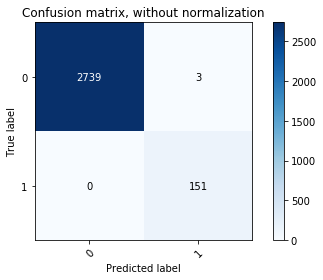

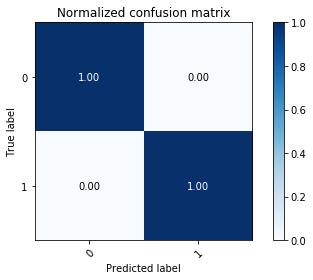

In [87]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(np_labels, np_predictions_nn, classes=[0,1],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(np_labels, np_predictions_nn, classes=[0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [88]:
probs_nn = nn.predict_proba(data_frame)

probs_nn = probs_nn[:,1]

print(average_precision_score(np_labels, probs_nn))
print(accuracy_score(np_labels, predictions_nn))
print(balanced_accuracy_score(np_labels, predictions_nn))
print(hinge_loss(np_labels, predictions_nn))
print(matthews_corrcoef(np_labels, predictions_nn))
print(roc_auc_score(np_labels, probs_nn))
print(f1_score(np_labels, predictions_nn))
print(hamming_loss(np_labels, predictions_nn))
print(jaccard_similarity_score(np_labels, predictions_nn))
print(log_loss(np_labels, predictions_nn))
print(zero_one_loss(np_labels, predictions_nn))

1.0
0.9989630141721396
0.99945295404814
0.9488420324922227
0.9896699965616845
1.0
0.9901639344262295
0.0010369858278603526
0.9989630141721396
0.03581705080436415
0.0010369858278603816


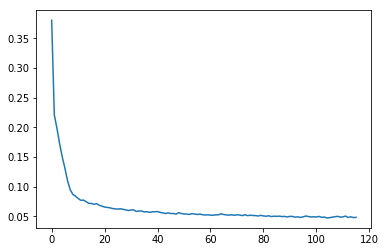

In [52]:
plt.plot(nn.best_estimator_.loss_curve_)